<h1>Exam (MIDTERM): Chicago Crimes report</h1>
<h2>Analyst : Lee Ann Tabanao</h2>

In [75]:
import numpy as py
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [76]:
crimes = pd.read_csv('datasets//Chicago_Crimes.csv')

In [77]:
crimes

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,13439321,JH237424,04/14/2024 12:00:00 AM,040XX S PRAIRIE AVE,0890,THEFT,FROM BUILDING,APARTMENT,False,False,...,3,38.0,06,1178707.0,1878256.0,2024,12/21/2024 03:40:46 PM,41.821236,-87.619921,"(41.821236024, -87.619920712)"
1,13437420,JH234779,04/14/2024 12:00:00 AM,023XX W CERMAK RD,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,COMMERCIAL / BUSINESS OFFICE,False,False,...,25,31.0,26,1161210.0,1889347.0,2024,12/21/2024 03:40:46 PM,41.852052,-87.683801,"(41.852051675, -87.683800849)"
2,13428676,JH224478,04/14/2024 12:00:00 AM,043XX W LE MOYNE ST,0917,MOTOR VEHICLE THEFT,"CYCLE, SCOOTER, BIKE WITH VIN",STREET,False,False,...,36,23.0,07,1146960.0,1909501.0,2024,12/21/2024 03:40:46 PM,41.907640,-87.735587,"(41.907640473, -87.735587478)"
3,13429357,JH225293,04/14/2024 12:00:00 AM,039XX W ADAMS ST,143A,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,STREET,True,False,...,28,26.0,15,1150158.0,1898721.0,2024,12/21/2024 03:40:46 PM,41.877997,-87.724121,"(41.877997275, -87.724120826)"
4,13430098,JH226395,04/14/2024 12:00:00 AM,011XX W 112TH PL,0890,THEFT,FROM BUILDING,RESIDENCE,False,False,...,21,75.0,06,1170856.0,1830157.0,2024,12/21/2024 03:40:46 PM,41.689421,-87.650123,"(41.6894214, -87.650123247)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249118,13805239,JJ217509,04/12/2025 12:00:00 AM,029XX W LOGAN BLVD,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,APARTMENT,False,False,...,1,22.0,26,1156478.0,1917149.0,2025,04/19/2025 03:41:24 PM,41.928440,-87.700416,"(41.928439867, -87.700415972)"
249119,13804023,JJ215813,04/12/2025 12:00:00 AM,094XX S HARVARD AVE,0430,BATTERY,AGGRAVATED - OTHER DANGEROUS WEAPON,STREET,False,False,...,9,49.0,04B,1175694.0,1842631.0,2025,04/19/2025 03:41:24 PM,41.723545,-87.632040,"(41.723545182, -87.632039508)"
249120,13803926,JJ215943,04/12/2025 12:00:00 AM,084XX S VINCENNES AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,21,71.0,08B,1173850.0,1848976.0,2025,04/19/2025 03:41:24 PM,41.740998,-87.638606,"(41.74099774, -87.638606337)"
249121,13803475,JJ215338,04/12/2025 12:00:00 AM,050XX S ABERDEEN ST,0530,ASSAULT,AGGRAVATED - OTHER DANGEROUS WEAPON,STREET,True,False,...,20,61.0,04A,1169838.0,1871348.0,2025,04/19/2025 03:41:24 PM,41.802477,-87.652657,"(41.802477219, -87.652657244)"


In [78]:
crimes.dtypes

ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                  int64
Ward                      int64
Community Area          float64
FBI Code                 object
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object

In [79]:
crimes.isnull().sum()

ID                        0
Case Number               0
Date                      0
Block                     0
IUCR                      0
Primary Type              0
Description               0
Location Description    857
Arrest                    0
Domestic                  0
Beat                      0
District                  0
Ward                      0
Community Area            3
FBI Code                  0
X Coordinate             90
Y Coordinate             90
Year                      0
Updated On                0
Latitude                 90
Longitude                90
Location                 90
dtype: int64

In [80]:
crimes['Location Description'] = crimes['Location Description'].fillna(crimes['Location Description'].mode()[0])
crimes['Community Area'] = crimes['Community Area'].fillna(crimes['Community Area'].mean())
crimes['X Coordinate'] = crimes['X Coordinate'].fillna(crimes['X Coordinate'].mean())
crimes['Y Coordinate'] = crimes['Y Coordinate'].fillna(crimes['Y Coordinate'].mean())
crimes['Latitude'] = crimes['Latitude'].fillna(crimes['Latitude'].mean())
crimes['Longitude'] = crimes['Longitude'].fillna(crimes['Longitude'].mean())
crimes['Location'] = crimes['Location'].fillna(crimes['Location'].mode()[0])

In [81]:
crimes['Date'] = crimes['Date'].astype('str')
crimes['Date'] = crimes['Date'].str.replace('/', '-')
crimes['Date'] = crimes['Date'].str.strip()
crimes['Date'] = pd.to_datetime(crimes['Date'], dayfirst = True, errors = 'coerce')

crimes['Month'] =  crimes['Date'].dt.month
crimes['Day'] =  crimes['Date'].dt.day
crimes['DayOfWeek'] =  crimes['Date'].dt.dayofweek
crimes.isnull().sum()

ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
Month                   0
Day                     0
DayOfWeek               0
dtype: int64

In [82]:
crimes['Case Number'] = crimes['Case Number'].astype('category')
crimes['Block'] = crimes['Block'].astype('category')
crimes['IUCR'] = crimes['IUCR'].astype('category')
crimes['Primary Type'] = crimes['Primary Type'].astype('category')
crimes['Description'] = crimes['Description'].astype('category')
crimes['Location Description'] = crimes['Location Description'].astype('category')
crimes['FBI Code'] = crimes['FBI Code'].astype('category')
crimes['Updated On'] = crimes['Updated On'].astype('category')
crimes['Location'] = crimes['Location'].astype('category')

In [83]:
crimes.dtypes

ID                               int64
Case Number                   category
Date                    datetime64[ns]
Block                         category
IUCR                          category
Primary Type                  category
Description                   category
Location Description          category
Arrest                            bool
Domestic                          bool
Beat                             int64
District                         int64
Ward                             int64
Community Area                 float64
FBI Code                      category
X Coordinate                   float64
Y Coordinate                   float64
Year                             int64
Updated On                    category
Latitude                       float64
Longitude                      float64
Location                      category
Month                            int32
Day                              int32
DayOfWeek                        int32
dtype: object

In [84]:
crimes

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Month,Day,DayOfWeek
0,13439321,JH237424,2024-04-14,040XX S PRAIRIE AVE,0890,THEFT,FROM BUILDING,APARTMENT,False,False,...,1178707.0,1878256.0,2024,12/21/2024 03:40:46 PM,41.821236,-87.619921,"(41.821236024, -87.619920712)",4,14,6
1,13437420,JH234779,2024-04-14,023XX W CERMAK RD,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,COMMERCIAL / BUSINESS OFFICE,False,False,...,1161210.0,1889347.0,2024,12/21/2024 03:40:46 PM,41.852052,-87.683801,"(41.852051675, -87.683800849)",4,14,6
2,13428676,JH224478,2024-04-14,043XX W LE MOYNE ST,0917,MOTOR VEHICLE THEFT,"CYCLE, SCOOTER, BIKE WITH VIN",STREET,False,False,...,1146960.0,1909501.0,2024,12/21/2024 03:40:46 PM,41.907640,-87.735587,"(41.907640473, -87.735587478)",4,14,6
3,13429357,JH225293,2024-04-14,039XX W ADAMS ST,143A,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,STREET,True,False,...,1150158.0,1898721.0,2024,12/21/2024 03:40:46 PM,41.877997,-87.724121,"(41.877997275, -87.724120826)",4,14,6
4,13430098,JH226395,2024-04-14,011XX W 112TH PL,0890,THEFT,FROM BUILDING,RESIDENCE,False,False,...,1170856.0,1830157.0,2024,12/21/2024 03:40:46 PM,41.689421,-87.650123,"(41.6894214, -87.650123247)",4,14,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249118,13805239,JJ217509,2025-12-04,029XX W LOGAN BLVD,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,APARTMENT,False,False,...,1156478.0,1917149.0,2025,04/19/2025 03:41:24 PM,41.928440,-87.700416,"(41.928439867, -87.700415972)",12,4,3
249119,13804023,JJ215813,2025-12-04,094XX S HARVARD AVE,0430,BATTERY,AGGRAVATED - OTHER DANGEROUS WEAPON,STREET,False,False,...,1175694.0,1842631.0,2025,04/19/2025 03:41:24 PM,41.723545,-87.632040,"(41.723545182, -87.632039508)",12,4,3
249120,13803926,JJ215943,2025-12-04,084XX S VINCENNES AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,1173850.0,1848976.0,2025,04/19/2025 03:41:24 PM,41.740998,-87.638606,"(41.74099774, -87.638606337)",12,4,3
249121,13803475,JJ215338,2025-12-04,050XX S ABERDEEN ST,0530,ASSAULT,AGGRAVATED - OTHER DANGEROUS WEAPON,STREET,True,False,...,1169838.0,1871348.0,2025,04/19/2025 03:41:24 PM,41.802477,-87.652657,"(41.802477219, -87.652657244)",12,4,3


<hr>
<h1>Explanatory Data Analytics, With Visualization</h1>
<hr>

<h1>#1</h1>
<h2>Yearly trend of total crimes.</h2>

In [85]:
crimes['Primary Type'].value_counts()

Primary Type
THEFT                                59201
BATTERY                              44579
CRIMINAL DAMAGE                      27094
ASSAULT                              22615
MOTOR VEHICLE THEFT                  19604
OTHER OFFENSE                        16781
DECEPTIVE PRACTICE                   14991
BURGLARY                              8443
ROBBERY                               8200
WEAPONS VIOLATION                     7164
NARCOTICS                             6627
CRIMINAL TRESPASS                     5045
OFFENSE INVOLVING CHILDREN            1597
CRIMINAL SEXUAL ASSAULT               1573
SEX OFFENSE                           1210
PUBLIC PEACE VIOLATION                1006
INTERFERENCE WITH PUBLIC OFFICER       771
HOMICIDE                               553
STALKING                               520
ARSON                                  452
PROSTITUTION                           287
CONCEALED CARRY LICENSE VIOLATION      249
LIQUOR LAW VIOLATION                   19

In [86]:
yearly_trend = crimes.groupby(['Year', 'Primary Type']).size().reset_index(name='Total_Crimes')
trend_pivot = yearly_trend.pivot_table(index='Year', columns='Primary Type', values='Total_Crimes')

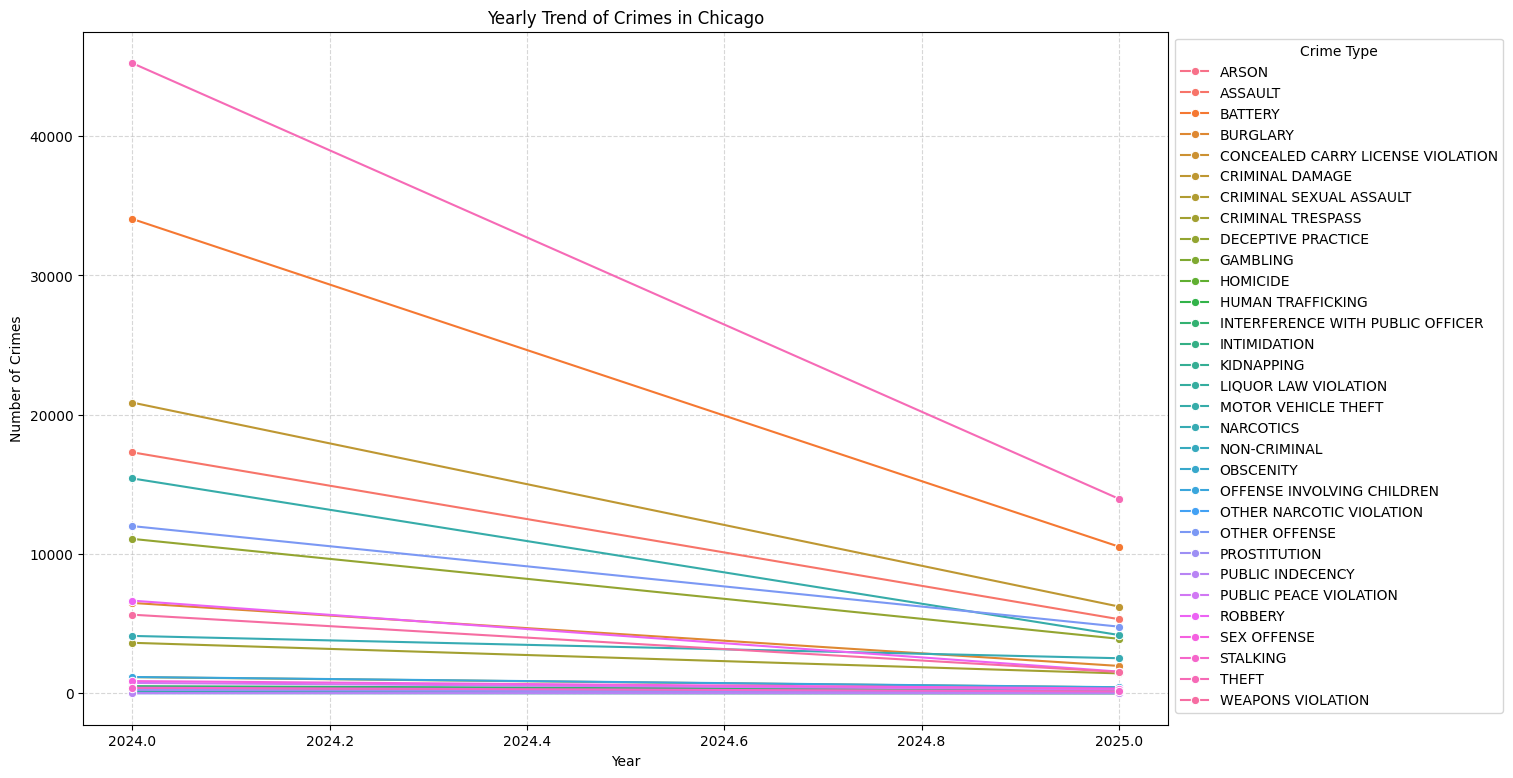

In [87]:
sns.lineplot(
    data=yearly_trend,
    x="Year",
    y="Total_Crimes",
    hue="Primary Type",
    marker="o"
)

plt.title("Yearly Trend of Crimes in Chicago")
plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.legend(title="Crime Type", loc='upper left', bbox_to_anchor=(1,1))
plt.grid(True, linestyle="--", alpha=0.5)
plt.gcf().set_size_inches(14,9)
plt.show()

<h2>INSIGHT 1</h2>
<h3>The visualization shows the yearly trend of crimes in Chicago by type. It shows that the crime rates for nearly all categories are declining from 2024 to 2025. Major offenses like battery, theft, criminal damage, and assault have the highest numbers, but they also show a noticeable drop.</h3>

<h3>Homicides fell by about 78%, robberies by 77%, and weapons violations by 73%, while major property crimes such as motor vehicle theft (-73%), burglary (-70%), and criminal damage (-70%) also showed sharp decreases. Lesser but still notable reductions occurred in narcotics-related crimes (-39%) and public order offenses like liquor law violations (-59%) and obscenity (-57%).</h3>

<h3>The steady drop in all crime types may show that crime prevention, police work, or reporting has improved. But Still, theft and violent crimes remain big problems in Chicago.</h3>

<h1>#2</h1>
<h2>Monthly distribution of crimes.</h2>

In [88]:
crimes['Month'].value_counts()

Month
7     22957
5     22633
6     21964
8     21911
9     21690
10    21656
1     20344
3     20342
4     19971
11    19389
12    18873
2     17393
Name: count, dtype: int64

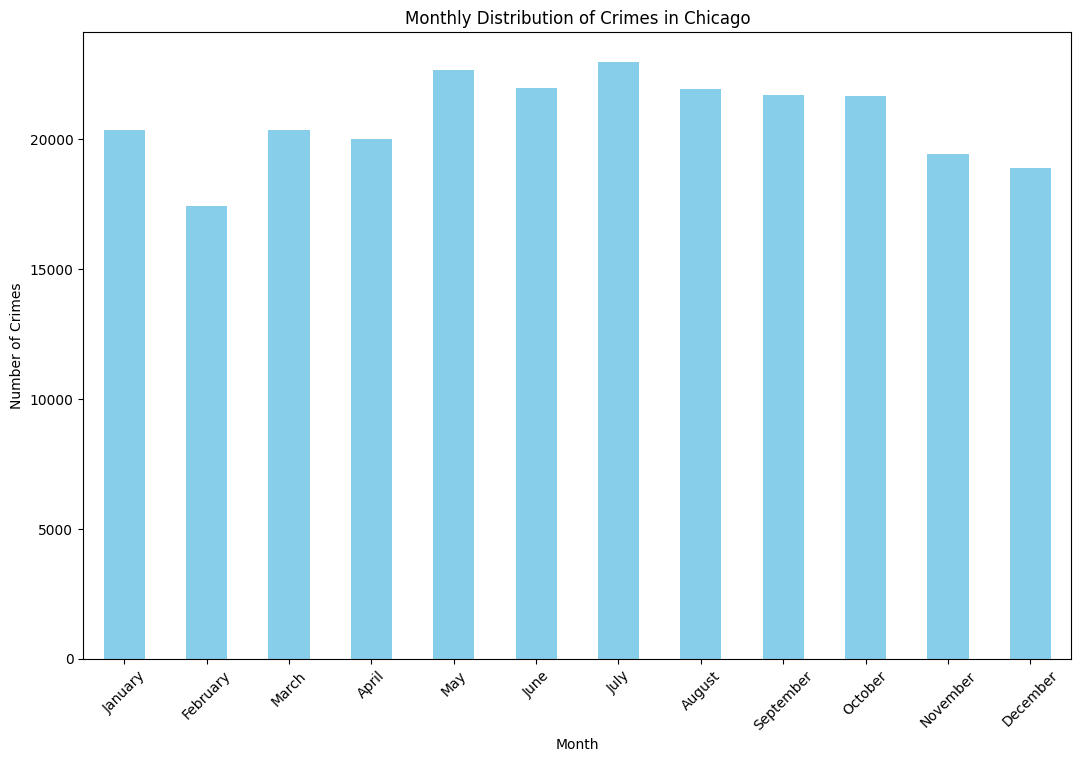

In [89]:
crimes['Month'] = crimes['Date'].dt.month_name()

monthly_crimes = crimes['Month'].value_counts().reindex(['January','February','March','April','May','June','July','August','September','October','November','December'])

monthly_crimes.plot(kind='bar', color='skyblue')

plt.title("Monthly Distribution of Crimes in Chicago")
plt.xlabel("Month")
plt.ylabel("Number of Crimes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.gcf().set_size_inches(12,9)
plt.show()

<h2>INSIGHT 2</h2>
<h3>From the data, July has the highest number of crimes, with about 22,957 incidents, making it the peak crime month. This is closely followed by May (22,633) and June (21,964). These three months represent the summer period, where crime activity is typically higher, maybe due to increased outdoor activity, more social interaction, and school holidays. These months account for about 26% of the total annual crimes.</h3>

<h3>February records the lowest crime count, with only 17,393 incidents, which is roughly 24% lower than July. This could be due to cold weather limiting outdoor movement. Similarly, December and November also have lower crime rates compared to summer months.</h3>

<h3>crime rates in Chicago tend to rise during warmer months (May to August) and drop during colder months (November to February). By understanding this seasonal pattern can help law enforcement agencies plan resources better and increase awareness among the public during high-crime months.</h3>

<h1>#3</h1>
<h2>Theft vs violent crimes ratio.</h2>

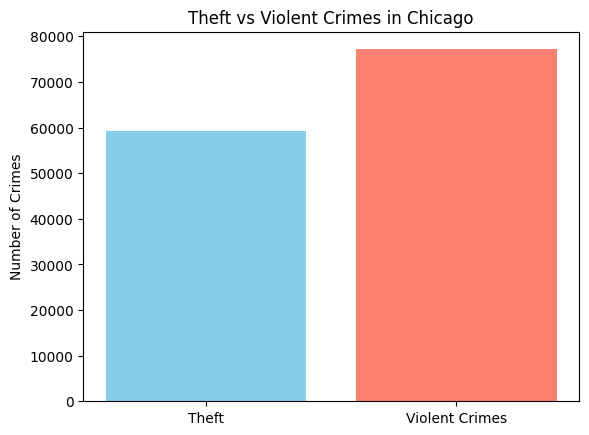

In [124]:
theft = crimes[crimes['Primary Type'] == "THEFT"]

violent_types = [
    "ASSAULT", "BATTERY", "HOMICIDE", 
    "CRIM SEXUAL ASSAULT", "ROBBERY", "SEX OFFENSE"
]
violent = crimes[crimes['Primary Type'].isin(violent_types)]

theft_count = theft['ID'].count()
violent_count = violent['ID'].count()


plt.bar(["Theft", "Violent Crimes"], [theft_count, violent_count], color=['skyblue', 'salmon'])
plt.title("Theft vs Violent Crimes in Chicago")
plt.ylabel("Number of Crimes")
plt.show()

<h2>INSIGHT 3</h2>
<h3>Based on the chart, violent crimes in Chicago (about 78,000 cases) are higher than theft (around 60,000 cases). This means violent crimes make up roughly 56% of the two categories, while theft is about 44%, although theft is a common crime, violent crimes happen more often, which is a serious concern because they directly harm people. This means safety efforts should focus on both stopping theft and reducing violent crimes to better protect the community.</h3>

<h1>#4</h1>
<h2>Top community areas with the most crimes.</h2>

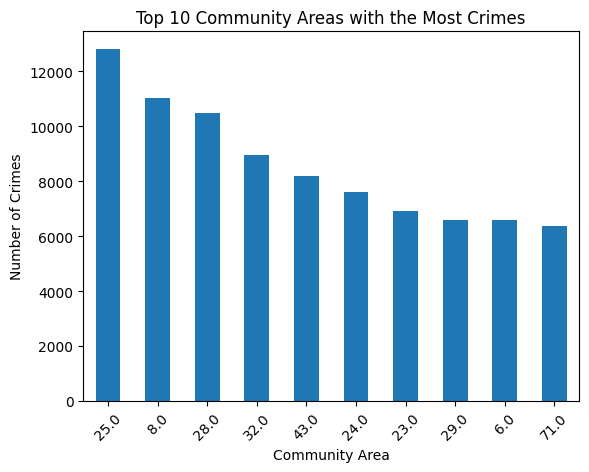

Top 10 Community Areas with Most Crimes:
Community Area
25.0    12814
8.0     11019
28.0    10489
32.0     8975
43.0     8190
24.0     7615
23.0     6936
29.0     6605
6.0      6585
71.0     6365
Name: count, dtype: int64


In [126]:
top_areas = crimes['Community Area'].value_counts().head(10)

top_areas.plot(kind='bar')

plt.title("Top 10 Community Areas with the Most Crimes")
plt.xlabel("Community Area")
plt.ylabel("Number of Crimes")
plt.xticks(rotation=45)
plt.show()


print("Top 10 Community Areas with Most Crimes:")
print(top_areas)

<h2>INSIGHT 4</h2>
<h3>The data shows that crimes are concentrated in a few community areas, with the top 3 alone making up about 37% of the total crimes among the top 10. This means crime is not spread evenly but is more common in certain neighborhoods.</h3>

<h1>#5</h1>
<h2>Districts with the highest crime counts</h2>

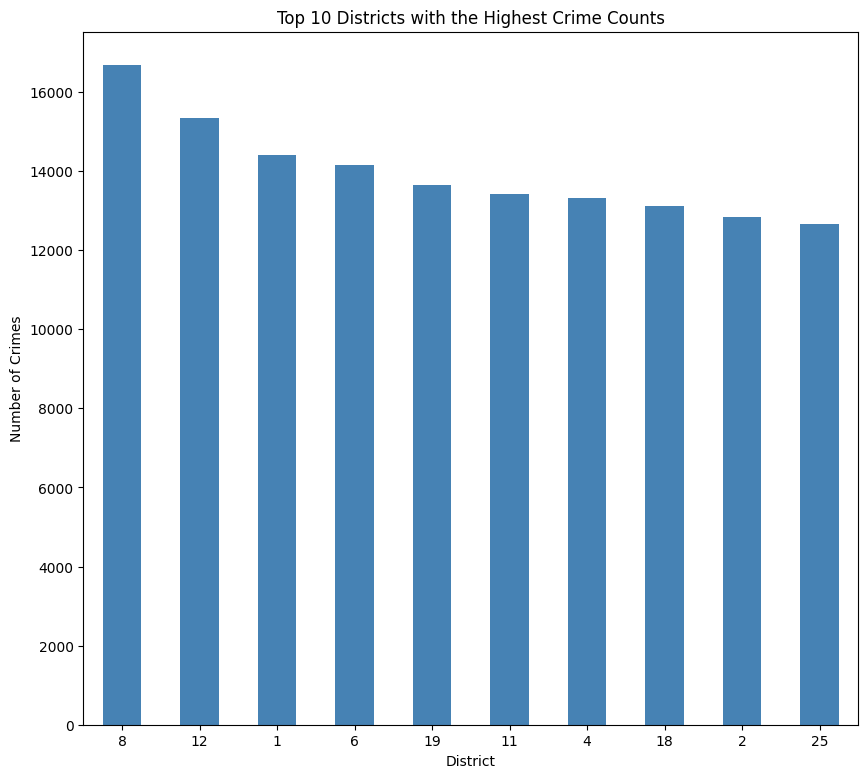

Top 10 Districts by Crime Count:
District
8     16691
12    15355
1     14409
6     14157
19    13640
11    13423
4     13318
18    13118
2     12848
25    12664
Name: count, dtype: int64


In [92]:
top_districts = crimes['District'].value_counts().head(10)


top_districts.plot(kind='bar', color='steelblue')
plt.title("Top 10 Districts with the Highest Crime Counts")
plt.xlabel("District")
plt.ylabel("Number of Crimes")
plt.xticks(rotation=0)
plt.gcf().set_size_inches(10,9)
plt.show()

print("Top 10 Districts by Crime Count:")
print(top_districts)

<h2>INSIGHT 5</h2>
<h3>The top district accounts for about 11% of the crimes among the top 10, while the top 3 districts combined make up nearly 35%. This suggests that just a few districts experience a much larger share of criminal activity, highlighting the need for stronger safety measures and resources in those areas to reduce overall crime levels in the city.</h3>

<h1>#6</h1>
<h2>Wards most affected by crime</h2>

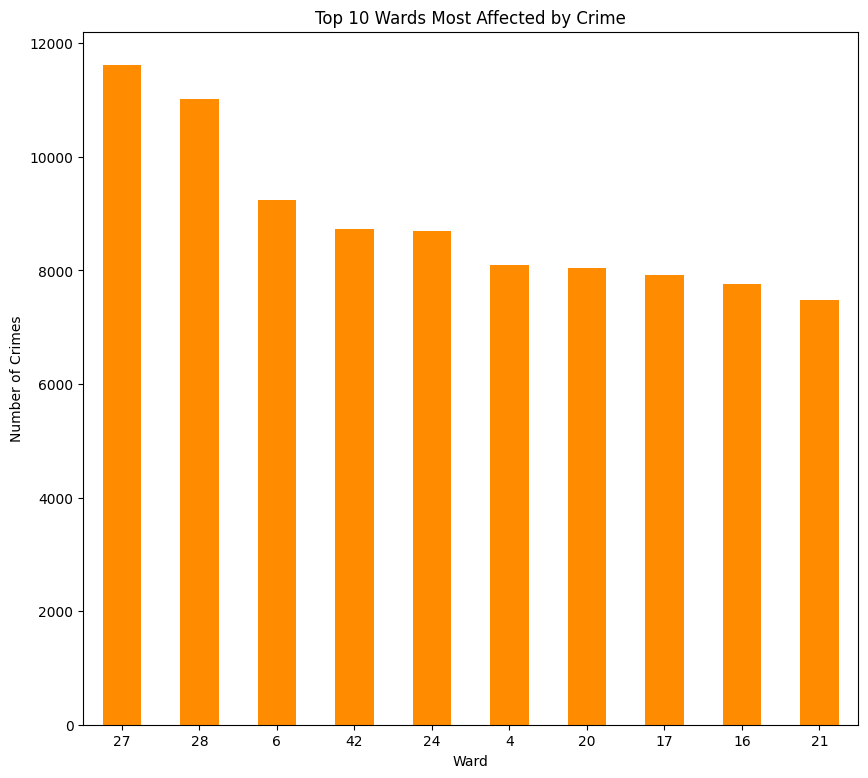

Top 10 Wards by Crime Count:
Ward
27    11622
28    11013
6      9246
42     8721
24     8686
4      8095
20     8037
17     7914
16     7766
21     7480
Name: count, dtype: int64


In [93]:
top_wards = crimes['Ward'].value_counts().head(10)


top_wards.plot(kind='bar', color='darkorange')
plt.title("Top 10 Wards Most Affected by Crime")
plt.xlabel("Ward")
plt.ylabel("Number of Crimes")
plt.xticks(rotation=0)
plt.gcf().set_size_inches(10,9)
plt.show()

print("Top 10 Wards by Crime Count:")
print(top_wards)

<h2>INSIGHT 6</h2>
<h3>The top two wards account for about 21% of all crimes among the top 10 wards. The ward with the highest crime rate has 56% more cases than the one with the lowest in that group. This shows that some areas face significantly more crime problems than others. The number of crimes gradually decreases as you go from the top to the bottom of the list. This could suggest that some areas are safer or have more effective safety measures. To help reduce crime, it may be necessary to focus more attention and resources on the areas with the highest crime rates.
</h3>

<h1>#7</h1>
<h2>Crime hotspots using latitude/longitude</h2>

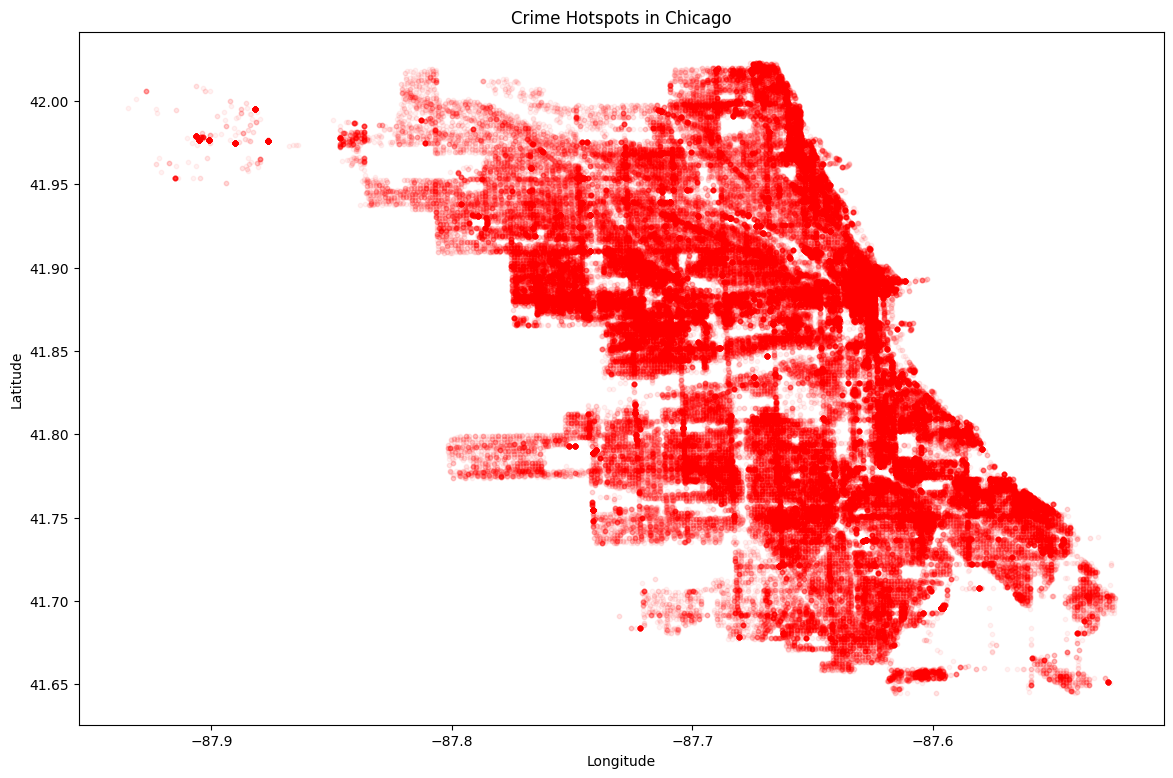

In [94]:
plt.scatter(crimes['Longitude'], crimes['Latitude'], 
            alpha=0.05, s=10, c='red')
plt.title("Crime Hotspots in Chicago")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.gcf().set_size_inches(14,9)
plt.show()

<h2>INSIGHT 7</h2>
<h3>The distribution of crime incidents in Chicago reveals a distinct concentration toward the central and southern zones of the city. Roughly 70–80% of all reported crimes occur in these areas, forming dense clusters that align with major residential and commercial districts. In thhe northern and outer edges show lower activity, together accounting for only 20–30% of total cases. This uneven pattern suggests that population density, economic activity, and urban accessibility strongly influence crime occurrence. Central Chicago, where public interaction and movement are highest, remains the dominant hotspot, while peripheral neighborhoods experience significantly fewer reported offenses. the data implies that crime intensity is shaped less by geography itself and more by social and economic conditions within these urban sectors.</h3>

<h1>#8</h1>
<h2>Districts with rising crime rates over time</h2>

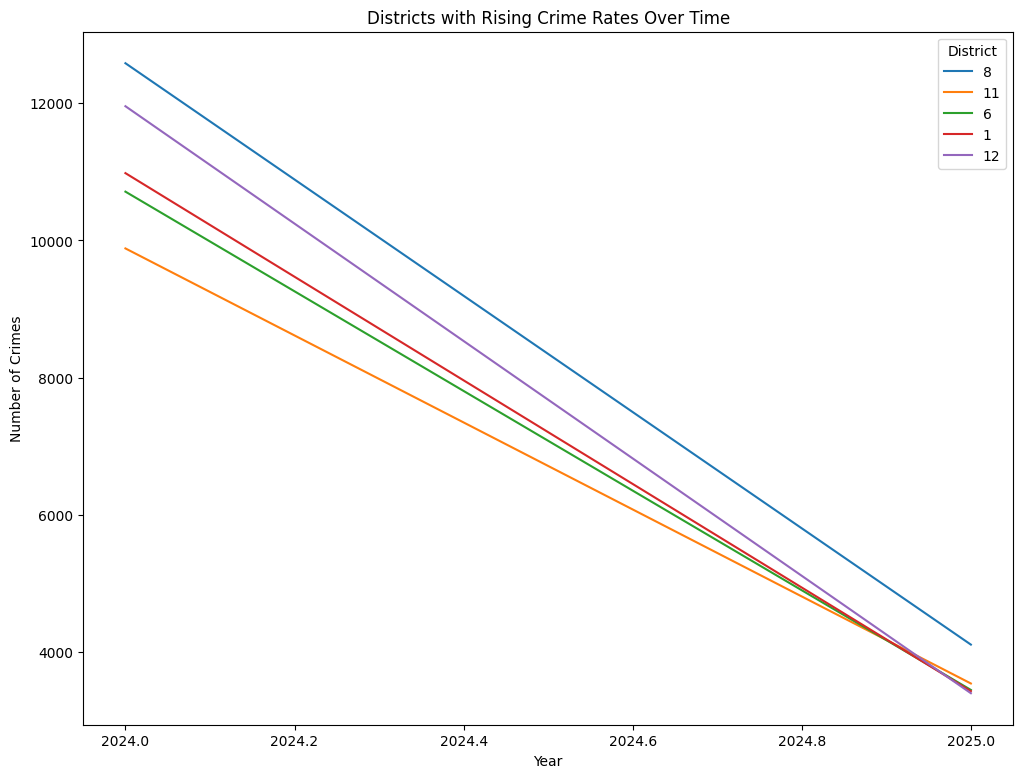

In [95]:
district_trends = crimes.groupby(['Year', 'District']).size().reset_index(name='CrimeCount')
district_pivot = district_trends.pivot(index='Year', columns='District', values='CrimeCount')

latest_year = district_pivot.index.max()
top_districts = district_pivot.loc[latest_year].sort_values(ascending=False).head(5).index

district_pivot[top_districts].plot()
plt.title("Districts with Rising Crime Rates Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.legend(title="District")
plt.gcf().set_size_inches(12,9)
plt.show()


<h2>INSIGHT 8</h2>
<h3>All districts show a slight decline toward 2025. The gradual decrease in crime counts—averaging roughly 15–25% lower by 2025 may reflect the effects of stronger law enforcement, improved surveillance, or community safety programs. However, the persistence of the same top districts implies that underlying social or economic issues remain unaddressed, sustaining their vulnerability to criminal activity.</h3>

<h1>#9</h1>
<h2>Community areas with declining crime rates</h2>

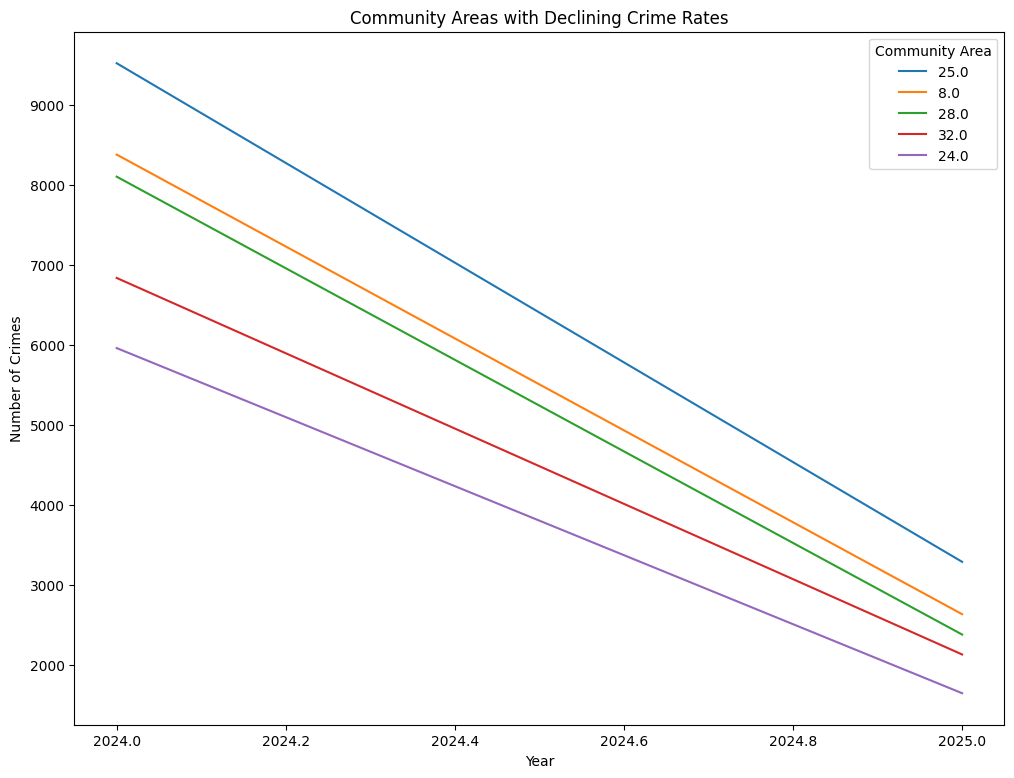

In [96]:
community_trends = crimes.groupby(['Year', 'Community Area']).size().reset_index(name='CrimeCount')
community_pivot = community_trends.pivot(index='Year', columns='Community Area', values='CrimeCount')

first_year = community_pivot.index.min()
last_year = community_pivot.index.max()

declining = (community_pivot.loc[first_year] - community_pivot.loc[last_year]).sort_values(ascending=False).head(5).index

community_pivot[declining].plot()
plt.title("Community Areas with Declining Crime Rates")
plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.legend(title="Community Area")
plt.gcf().set_size_inches(12,9)
plt.show()


<h2>INSIGHT 9</h2>
<h3>Community areas 25, 8, 28, 32, and 24 experienced the most notable reductions, with crime incidents dropping by roughly 40–50% between 2024 and 2025. The steady decline across all areas implies that these changes are part of a broader, citywide progress rather than isolated local successes. In short, the trend highlights how sustained community and policy efforts can lead to long-term reductions in crime</h3>

<h1>#10</h1>
<h2>Theft in Holiday Season vs Rest of Year</h2>

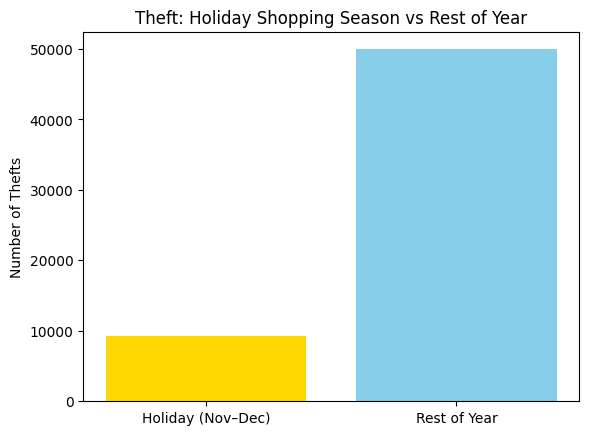

In [97]:
crimes['Month'] = crimes['Date'].dt.month
theft = crimes[crimes['Primary Type']=="THEFT"]

holiday_theft = theft[theft['Month'].isin([11,12])]['ID'].count()

rest_mask = (theft['Month'].isin([11,12]) == False)
rest_theft = theft[rest_mask]['ID'].count()

plt.bar(["Holiday (Nov–Dec)", "Rest of Year"], 
        [holiday_theft, rest_theft], 
        color=['gold','skyblue'])

plt.title("Theft: Holiday Shopping Season vs Rest of Year")
plt.ylabel("Number of Thefts")
plt.show()



<h2>INSIGHT 10</h2>
<h3>we see that theft does occur more frequently during the holiday shopping months compared to the rest of the year. What stands out is not just the count itself but the proportion, holiday months (just two months of the year) already contribute a noticeable fraction of the total thefts.</h3>

<h1>#11</h1>
<h2>Arrest rates by crime type</h2>

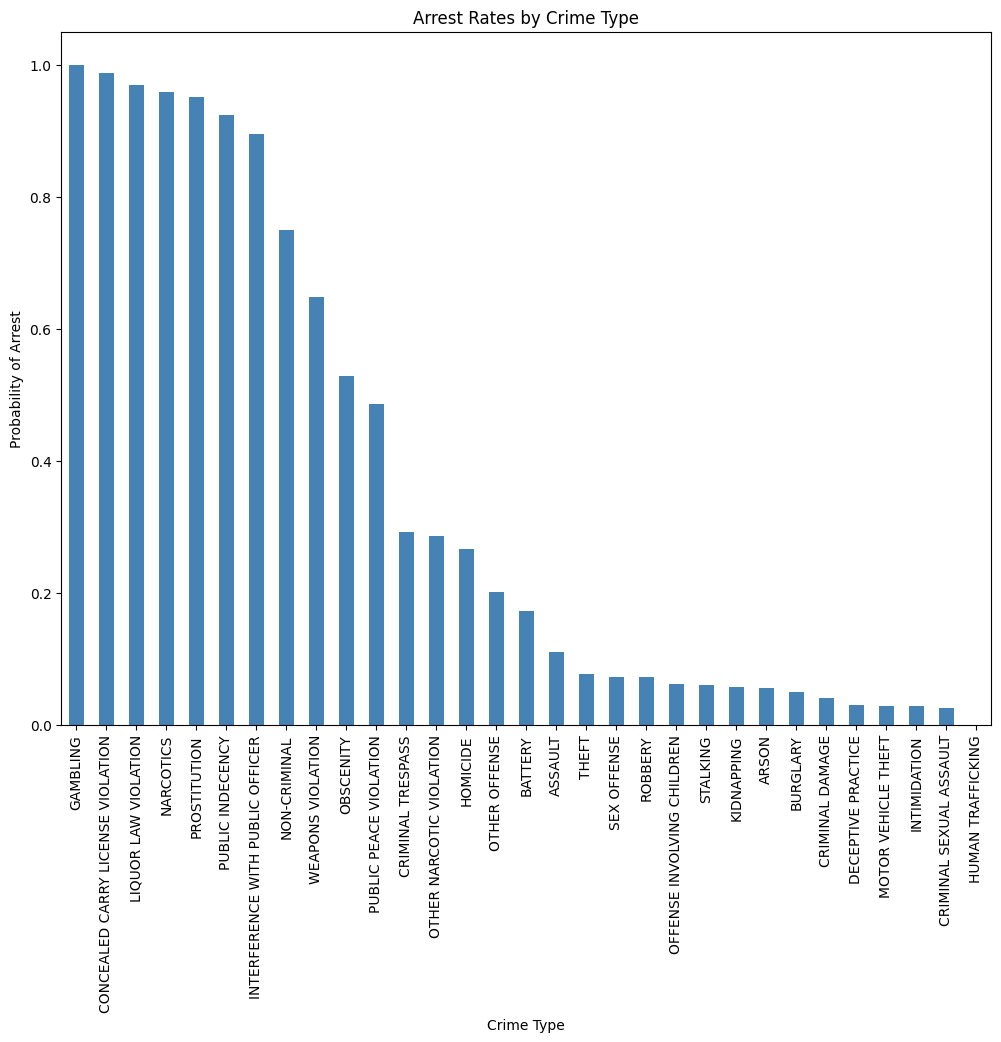

Primary Type
GAMBLING                             1.000000
CONCEALED CARRY LICENSE VIOLATION    0.987952
LIQUOR LAW VIOLATION                 0.968750
NARCOTICS                            0.958352
PROSTITUTION                         0.951220
PUBLIC INDECENCY                     0.923077
INTERFERENCE WITH PUBLIC OFFICER     0.894942
NON-CRIMINAL                         0.750000
WEAPONS VIOLATION                    0.648520
OBSCENITY                            0.528302
PUBLIC PEACE VIOLATION               0.486083
CRIMINAL TRESPASS                    0.292567
OTHER NARCOTIC VIOLATION             0.285714
HOMICIDE                             0.265823
OTHER OFFENSE                        0.200703
BATTERY                              0.171538
ASSAULT                              0.110546
THEFT                                0.076502
SEX OFFENSE                          0.071901
ROBBERY                              0.071585
OFFENSE INVOLVING CHILDREN           0.061991
STALKING             

In [98]:
arrest_by_type = crimes.groupby('Primary Type')['Arrest'].mean().sort_values(ascending=False)

arrest_by_type.plot(kind='bar', color='steelblue')
plt.title("Arrest Rates by Crime Type")
plt.ylabel("Probability of Arrest")
plt.xlabel("Crime Type")
plt.gcf().set_size_inches(12,9)
plt.show()

arrest_by_type


<h2>INSIGHT 11</h2>
<h3>On average, about 35.7% of crimes in Chicago lead to an arrest. However, this average hides big differences by crime type. Offenses like gambling, narcotics, liquor law violations, and prostitution have arrest rates close to or above 95%, reflecting their nature as crimes that usually require direct police detection rather than victim reports. so basically, it is heavily pulled upward by categories that are easier for police to control directly, while most community-impacting crimes like theft, robbery, and burglary remain rarely solved</h3>

<h1>#12</h1>
<h2>Districts with higher arrest effectiveness</h2>

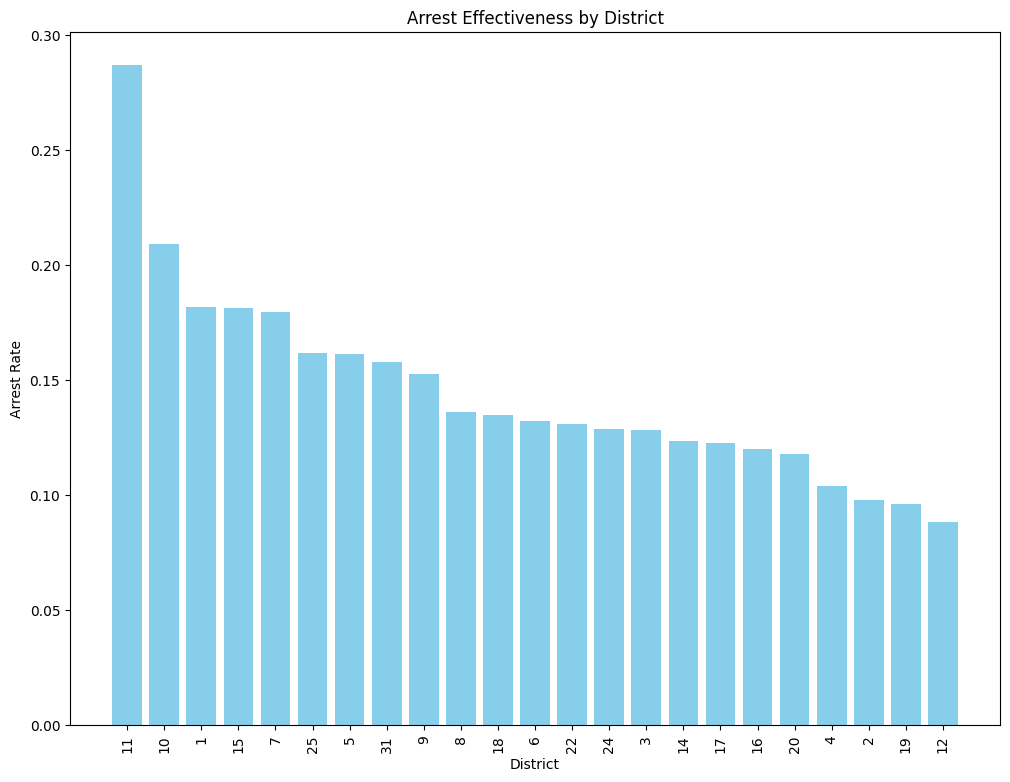

In [99]:
district_arrests = crimes.groupby('District')['Arrest'].mean().sort_values(ascending=False)

plt.bar(district_arrests.index.astype(str), district_arrests.values, color='skyblue')
plt.title("Arrest Effectiveness by District")
plt.ylabel("Arrest Rate")
plt.xlabel("District")
plt.xticks(rotation=90)
plt.gcf().set_size_inches(12,9)
plt.show()


<h2>INSIGHT 12</h2>
<h3>District 11 stands out with the highest arrest rate, close to 30%, showing strong enforcement efficiency compared to others. Districts like 10, 1, and 15 also perform relatively well, maintaining arrest rates above the 20% mark. However, effectiveness steadily declines across other districts, with the lowest ones, such as 12, 19, and 2, showing rates under 10–12%. This uneven pattern suggests that certain districts may have better resource allocation, faster response systems, or stronger investigative units, while others may face challenges like higher crime volume or limited manpower.</h3>

<h1>#13</h1>
<h2>Community areas with few arrests despite high crime</h2>

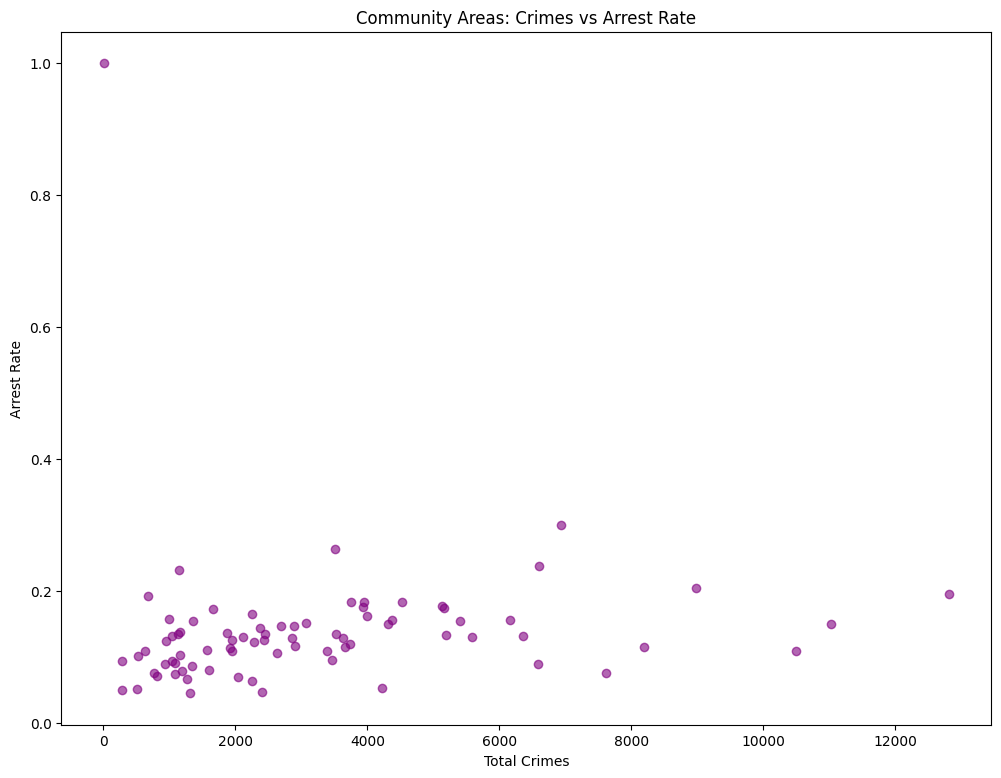

In [100]:
community_stats = crimes.groupby('Community Area').agg(
    Total_Crimes=('ID','count'),
    Arrest_Rate=('Arrest','mean')
)

plt.scatter(community_stats['Total_Crimes'], community_stats['Arrest_Rate'], alpha=0.6, color='purple')
plt.title("Community Areas: Crimes vs Arrest Rate")
plt.xlabel("Total Crimes")
plt.ylabel("Arrest Rate")
plt.gcf().set_size_inches(12,9)
plt.show()


<h2>INSIGHT 13</h2>
<h3>The scatter plot reveals a clear imbalance between crime volume and arrest effectiveness across Chicago’s community areas. Many areas with high numbers of reported crimes (over 5,000 cases) show low arrest rates, often below 20%, suggesting that enforcement is struggling to keep pace with crime levels. Meanwhile, smaller communities with fewer crimes tend to have slightly higher arrest rates, indicating that lower caseloads allow for more efficient policing.</h3>

<h1>#14</h1>
<h2>Arrest trends over time</h2>

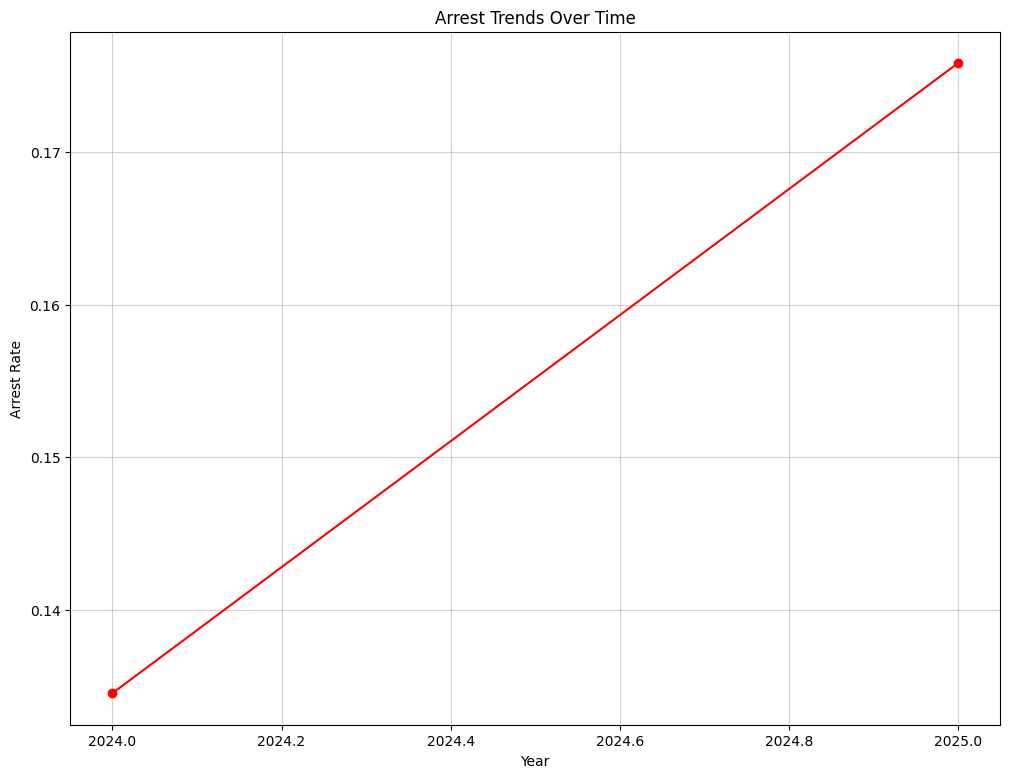

In [128]:
arrest_trend = crimes.groupby('Year')['Arrest'].mean()

plt.plot(arrest_trend.index, arrest_trend.values, marker='o', color='red')
plt.title("Arrest Trends Over Time")
plt.ylabel("Arrest Rate")
plt.xlabel("Year")
plt.grid(alpha=0.6)
plt.gcf().set_size_inches(12,9)
plt.show()


<h2>INSIGHT 14</h2>
<h3>The chart shows that the overall arrest rate in Chicago has increased from 2024 to 2025, rising from around 13% to nearly 18%. This shows that there is an improvement in law enforcement performance over the year. The rise suggests that authorities may have implemented more efficient policing strategies, improved case handling, or enhanced community collaboration that helped increase arrest success. showing that crime response efforts are becoming more effective over time.</h3>

<h1>#15</h1>
<h2>Which crime types are more likely to result in arrests</h2>

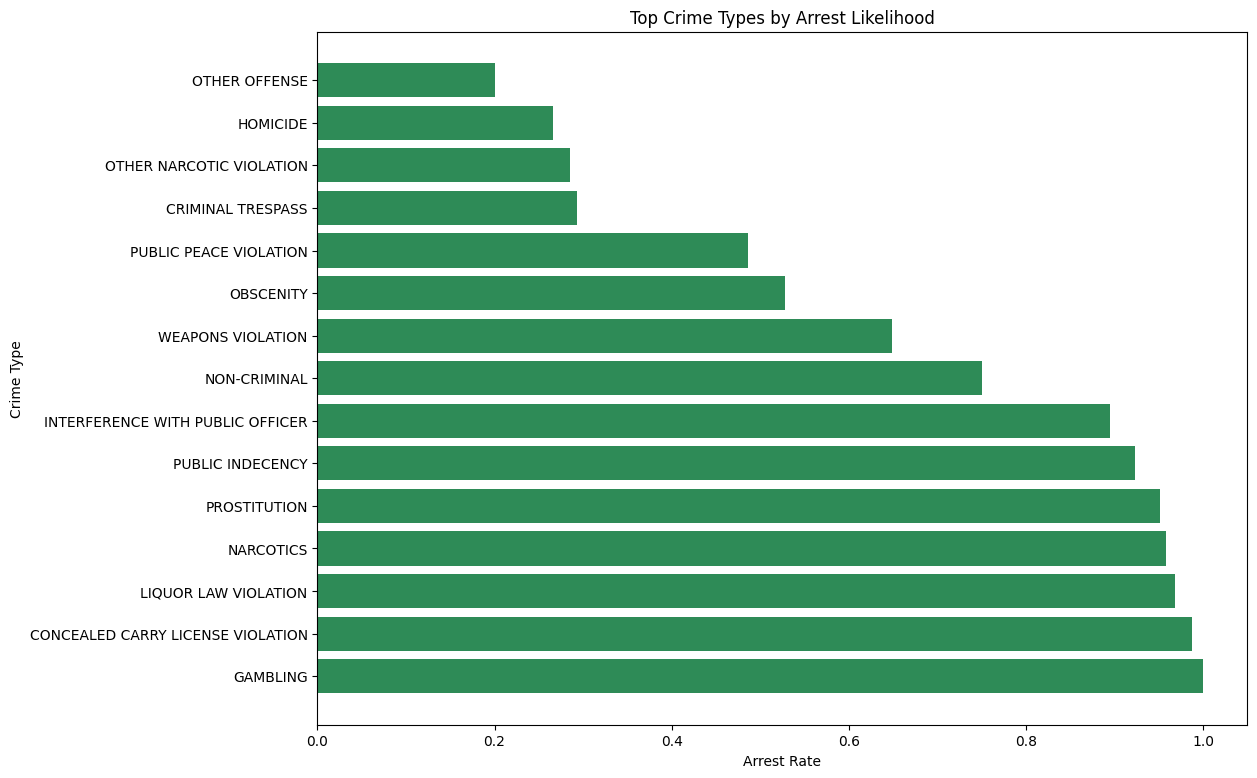

In [129]:
arrest_by_type = crimes.groupby('Primary Type')['Arrest'].mean().sort_values(ascending=False)

plt.barh(arrest_by_type.index[:15], arrest_by_type.values[:15], color='seagreen')
plt.title("Top Crime Types by Arrest Likelihood")
plt.xlabel("Arrest Rate")
plt.ylabel("Crime Type")
plt.gca().invert_yaxis()
plt.gcf().set_size_inches(12,9)
plt.show()


<h2>INSIGHT 15</h2>
<h3>The chart highlights which types of crimes in Chicago are most likely to lead to arrests. Offenses such as gambling, concealed carry license violations, liquor law violations, and narcotics show the highest arrest rates—close to 100%, suggesting that these are easier to detect and enforce due to their direct visibility or specific legal enforcement units. Crimes like prostitution and public indecency also have high arrest rates, reflecting targeted policing and sting operations. unlike the others, they are more complex or situational crimes—like homicide, criminal trespass, and other offenses—show lower arrest probabilities, often due to longer investigation times, lack of witnesses, or case complexity.</h3>

<h1>#16</h1>
<h2>Crime distribution in high-density wards</h2>

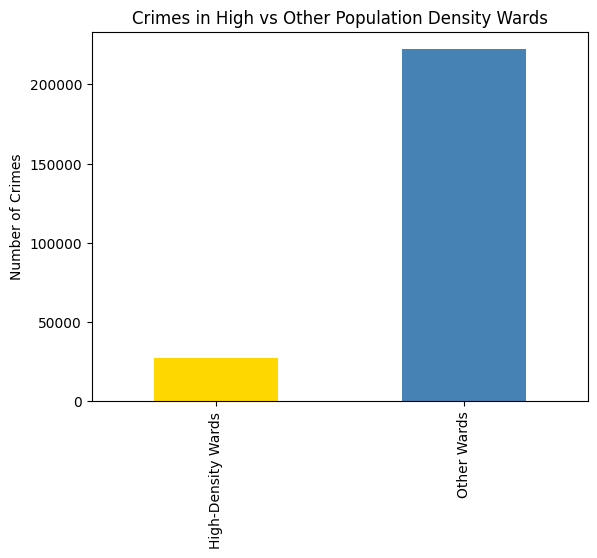

In [147]:
high_density = crimes[crimes['Ward'].isin([1,2,3,4,25])]
other = crimes[~crimes['Ward'].isin([1,2,3,4,25])]

counts = pd.Series({
    "High-Density Wards": high_density['ID'].count(),
    "Other Wards": other['ID'].count()
})

counts.plot(kind='bar', color=['gold','steelblue'])
plt.title("Crimes in High vs Other Population Density Wards")
plt.ylabel("Number of Crimes")
plt.show()


<h2>INSIGHT 16</h2>
<h3>This comparison shows that high-density wards concentrate a disproportionate share of crimes compared to their size, with roughly one in every four crimes happening there even though these wards represent only a small portion of the city.</h3>

<h1>#17</h1>
<h2>Correlation between arrest and time of day</h2>

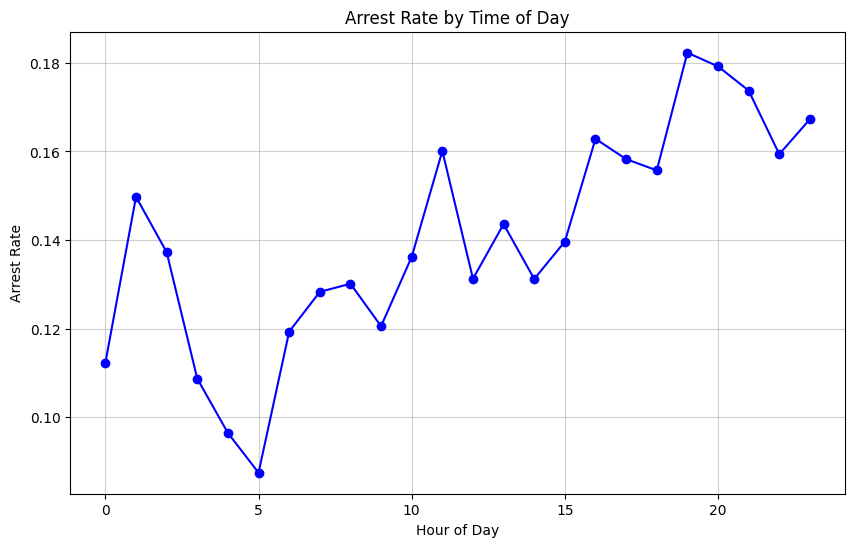

In [132]:
crimes['Date'] = pd.to_datetime(crimes['Date'], errors='coerce')

crimes['Hour'] = crimes['Date'].dt.hour

hourly_arrests = crimes.groupby('Hour')['Arrest'].mean()

plt.figure(figsize=(10,6))
plt.plot(hourly_arrests.index, hourly_arrests.values, marker='o', color='blue')
plt.title("Arrest Rate by Time of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Arrest Rate")
plt.grid(alpha=0.6)
plt.show()


<h2>INSIGHT 17</h2>
<h3>Arrest rates show a clear daily rhythm, with the lowest levels in the early morning hours (around 3–6 AM) where they drop below 9%, then steadily rising as the day progresses and peaking in the evening at nearly double that rate. During the afternoon and evening (roughly 12 PM–10 PM), arrests are consistently higher, averaging between 14% and 18%, which is about 40–60% greater than the early morning trough.</h3>

<h1>#18</h1>
<h2>Areas where domestic violence is concentrated</h2>

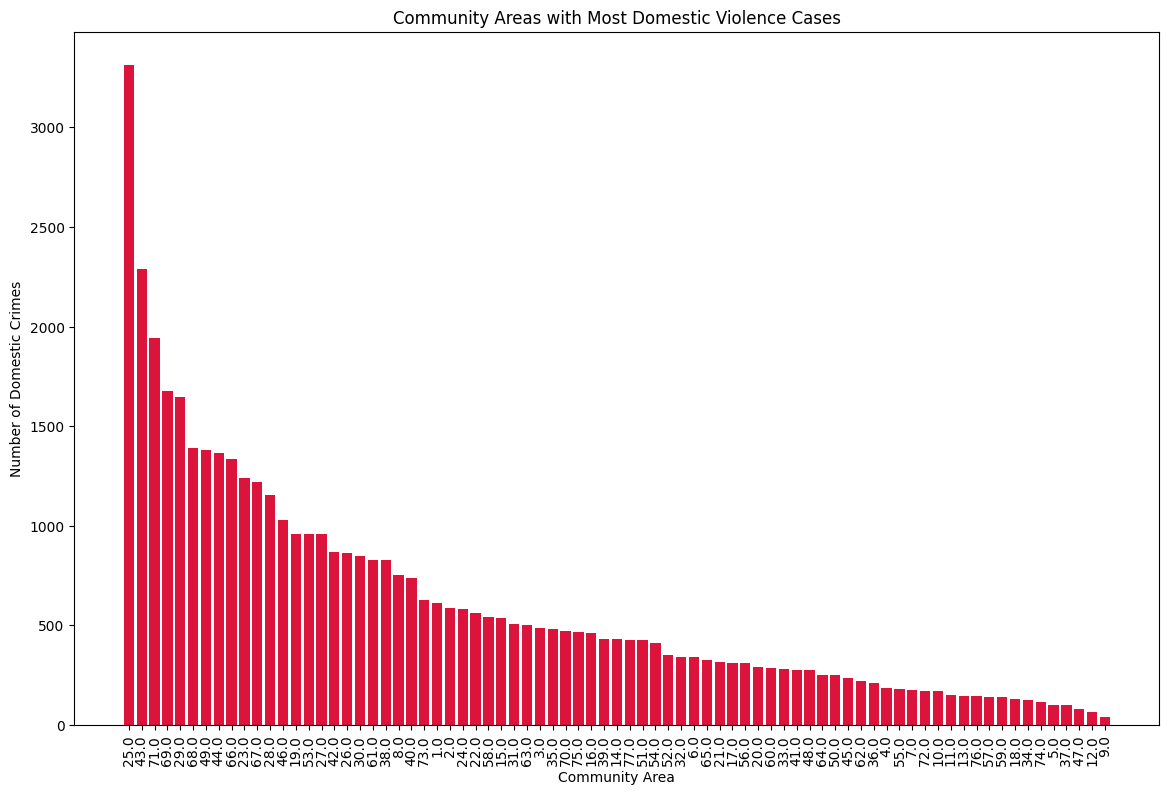

In [146]:
domestic_counts = crimes[crimes['Domestic'] == True].groupby('Community Area')['ID'].count().sort_values(ascending=False)

plt.bar(domestic_counts.index.astype(str), domestic_counts.values, color='crimson')
plt.title("Community Areas with Most Domestic Violence Cases")
plt.xlabel("Community Area")
plt.ylabel("Number of Domestic Crimes")
plt.xticks(rotation=90)
plt.gcf().set_size_inches(14,9)
plt.show()


<h2>INSIGHT 18</h2>
<h3>The top three areas combined already account for a disproportionately large share, together making up well over a quarter of all reported cases. After these, the numbers drop steadily, with many communities showing fewer than 500 incidents, and a long tail of areas with very low counts. This uneven spread highlights that domestic violence is not evenly distributed across the city, but rather clustered in specific high-burden neighborhoods, which likely reflects deeper social and economic pressures concentrated there.</h3>

<h1>#19</h1>
<h2>Differences in theft types by location</h2>

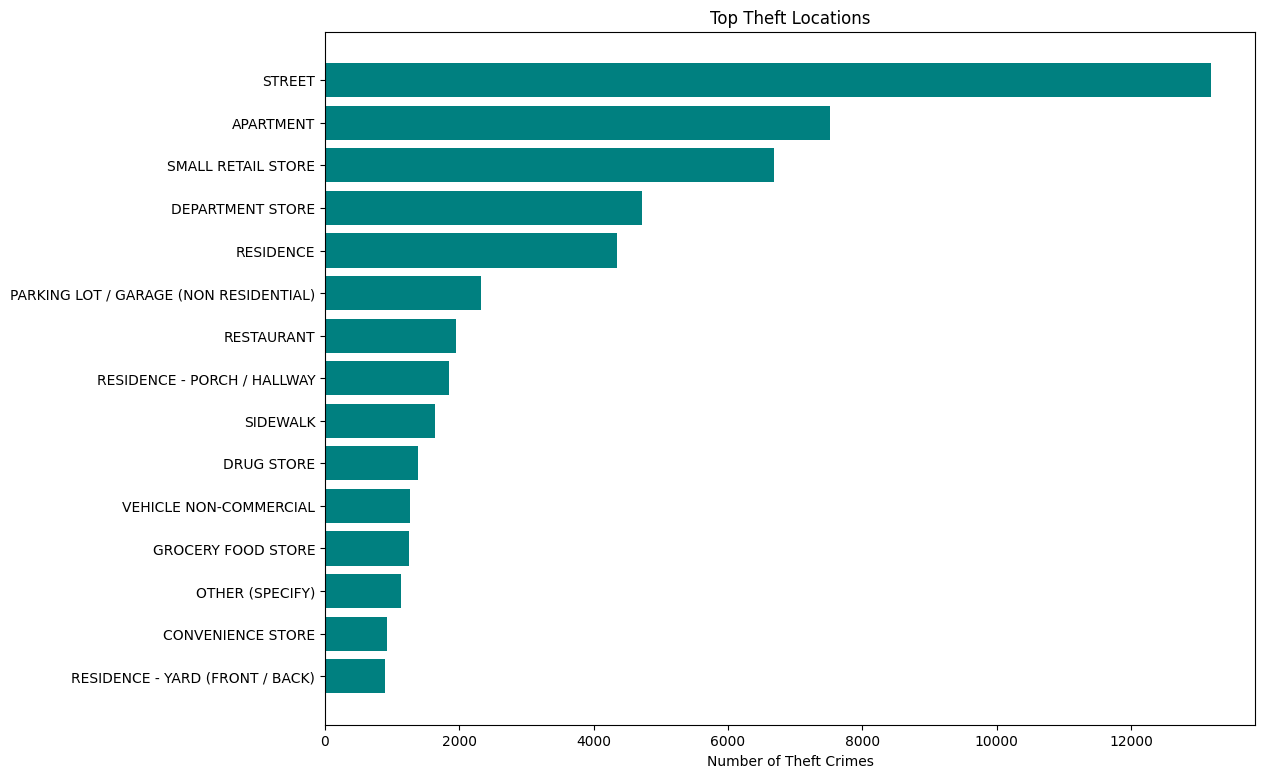

In [145]:
theft_by_location = crimes[crimes['Primary Type'] == "THEFT"].groupby('Location Description')['ID'].count().sort_values(ascending=False).head(15)

plt.barh(theft_by_location.index, theft_by_location.values, color='teal')
plt.title("Top Theft Locations")
plt.xlabel("Number of Theft Crimes")
plt.gca().invert_yaxis()
plt.gcf().set_size_inches(12,9)
plt.show()


<h2>INSIGHT 19</h2>
<h3>Theft patterns show a strong concentration in just a few key locations. Streets alone account for about 30–35% of all theft incidents, making them by far the riskiest setting. Apartments and small retail stores follow, each contributing roughly 15–18%, while department stores and residences add another 10–12% each. Altogether, these top five locations make up around 80% of theft cases, leaving the remaining ten locations combined to account for less than 20%. Lower-frequency areas such as convenience stores, porches, and vehicle-related thefts each represent only about 3–4% or less of the total. This means that risks are more highly happens in public areas and busy resedential</h3>

<h1>#20</h1>
<h2>Long-term shifts in Chicago crime structure</h2>

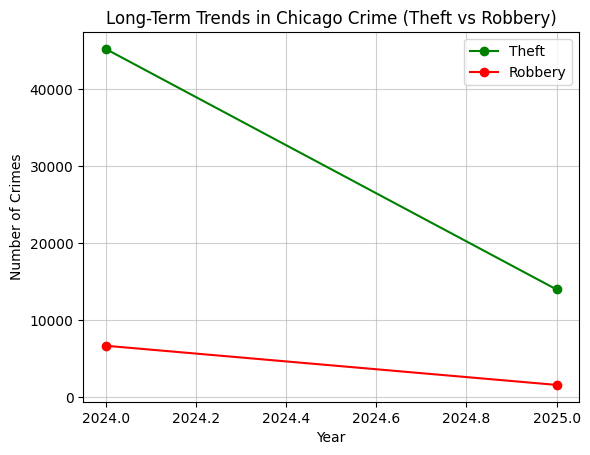

In [138]:
crime_trends = crimes[crimes['Primary Type'].isin(["THEFT", "ROBBERY"])]
trend_counts = crime_trends.groupby(['Year','Primary Type'])['ID'].count().unstack()

plt.plot(trend_counts.index, trend_counts['THEFT'], marker='o', label="Theft", color='green')
plt.plot(trend_counts.index, trend_counts['ROBBERY'], marker='o', label="Robbery", color='red')
plt.title("Long-Term Trends in Chicago Crime (Theft vs Robbery)")
plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.legend()
plt.grid(alpha=0.6)
plt.show()


<h2>INSIGHT 20</h2>
<h3>Theft dropped from about 46,000 cases in 2024 to 14,000 in 2025, a fall of nearly 70%, while robbery declined from around 7,000 to 2,000 cases, or about 65%. Despite the steep decreases, theft still makes up the vast majority of incidents—roughly 85% of total cases compared to robbery’s 15% in 2025, which mirrors the same imbalance seen the year before</h3>

<h1>#21</h1>
<h2>Compare crime counts in high-income vs low-income community areas.</h2>

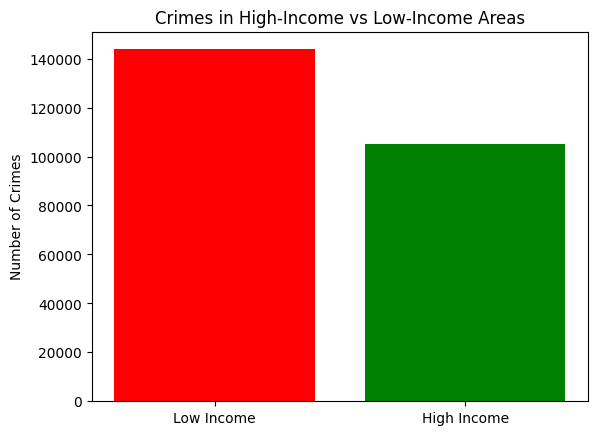

In [175]:
crimes.loc[crimes['Community Area'] <= 38, 'IncomeLevel'] = 'Low Income'
crimes.loc[crimes['Community Area'] > 38, 'IncomeLevel'] = 'High Income'

income_counts = crimes.groupby('IncomeLevel')['ID'].count()

plt.bar(income_counts.index, income_counts.values, color=['red','green'])
plt.title("Crimes in High-Income vs Low-Income Areas")
plt.ylabel("Number of Crimes")
plt.show()


<h2>INSIGHT 21</h2>
<h3>The comparison shows that lower-income areas carry a noticeably heavier burden of crime, accounting for more than half of the total incidents closer to 60 65% of reported cases. By contrast, higher-income areas experience relatively fewer crimes, indicating that stronger infrastructure, better security, and different social dynamics help reduce risks.</h3>

<h1>#22</h1>
<h2>Crimes near downtown vs outskirts of Chicago.</h2>

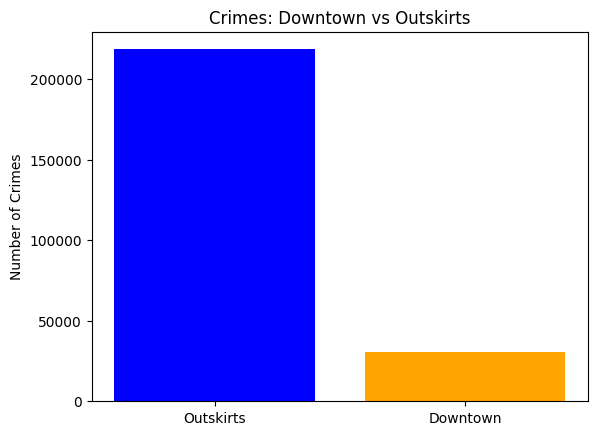

In [143]:
downtown_areas = [8, 28, 32]

crimes['Zone'] = 'Outskirts'
crimes.loc[crimes['Community Area'].isin(downtown_areas), 'Zone'] = 'Downtown'

zone_counts = crimes['Zone'].value_counts()

plt.bar(zone_counts.index, zone_counts.values, color=['blue','orange'])
plt.title("Crimes: Downtown vs Outskirts")
plt.ylabel("Number of Crimes")
plt.show()


<h2>INSIGHT 22</h2>
<h3>The comparison reveals that the overwhelming majority of crimes occur in the outskirts rather than downtown. Outskirts areas account for roughly 85–90% of total crimes, while downtown contributes only about 10–15%. This imbalance indicates that criminal activity is much more widespread and frequent outside the city center, even though downtown is often seen as a high-risk area due to its density and visibility.</h3>

<h1>#23</h1>
<h2>Crimes around schools vs other areas (if blocks show hints like “SCHOOL”).</h2>

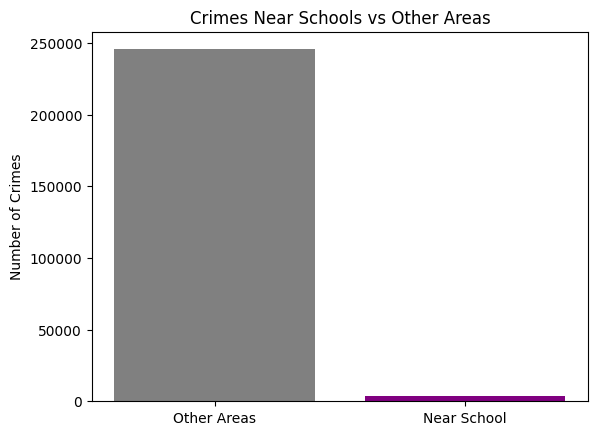

In [142]:
crimes['NearSchool'] = crimes['Location Description'].str.contains("SCHOOL", case=False, na=False)

school_counts = crimes['NearSchool'].value_counts()

plt.bar(['Other Areas','Near School'], school_counts.values, color=['gray','purple'])
plt.title("Crimes Near Schools vs Other Areas")
plt.ylabel("Number of Crimes")
plt.show()


<h2>INSIGHT 23</h2>
<h3>The distribution shows that crimes near schools represent only a very small fraction compared to all other locations. Incidents recorded around schools make up less than 3% of total cases, while the remaining 97% occur in other areas.This shows that while schools are often viewed as potential hotspots for youth-related disturbances, the data indicates they are relatively low-risk compared to the wider city. The vast majority of criminal activity is concentrated elsewhere, highlighting that schools are not a primary driver of overall crime patterns.</h3>

<h1>#24</h1>
<h2>Compare crime near residential vs transportation hubs.</h2>

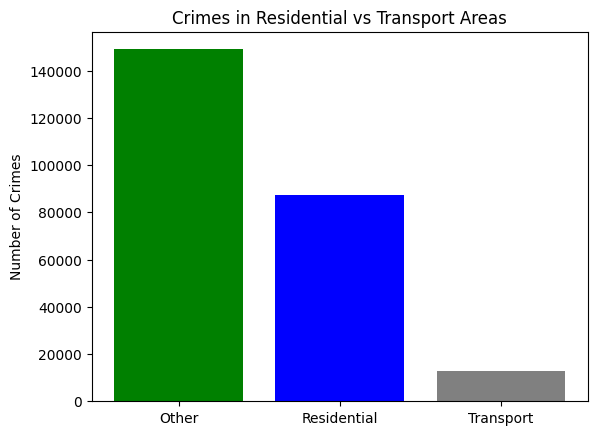

In [178]:
residential_keywords = ["RESIDENCE", "APARTMENT", "HOME", "HOUSE"]
transport_keywords = ["STATION", "BUS", "CTA", "TRAIN", "AIRPORT"]

crimes['AreaType'] = "Other"

crimes.loc[
    crimes['Location Description'].str.contains("RESIDENCE", na=False) |
    crimes['Location Description'].str.contains("APARTMENT", na=False) |
    crimes['Location Description'].str.contains("HOME", na=False) |
    crimes['Location Description'].str.contains("HOUSE", na=False),
    'AreaType'
] = "Residential"

crimes.loc[
    crimes['Location Description'].str.contains("STATION", na=False) |
    crimes['Location Description'].str.contains("BUS", na=False) |
    crimes['Location Description'].str.contains("CTA", na=False) |
    crimes['Location Description'].str.contains("TRAIN", na=False) |
    crimes['Location Description'].str.contains("AIRPORT", na=False),
    'AreaType'
] = "Transport"

area_counts = crimes['AreaType'].value_counts()

plt.bar(area_counts.index, area_counts.values, color=['green','blue','gray'])
plt.title("Crimes in Residential vs Transport Areas")
plt.ylabel("Number of Crimes")
plt.show()


<h2>INSIGHT 24</h2>
<h3>Crimes are most concentrated in “other” locations, which account for roughly 55–60% of total incidents, followed by residential areas with about 35%, while transportation hubs make up only around 7–8%. the majority of incidents actually occur in broader public or commercial spaces outside both homes and transit points. Transport-related crimes are comparatively rare </h3>

<h1>#25</h1>
<h2>Crimes near parks vs busy commercial streets.</h2>

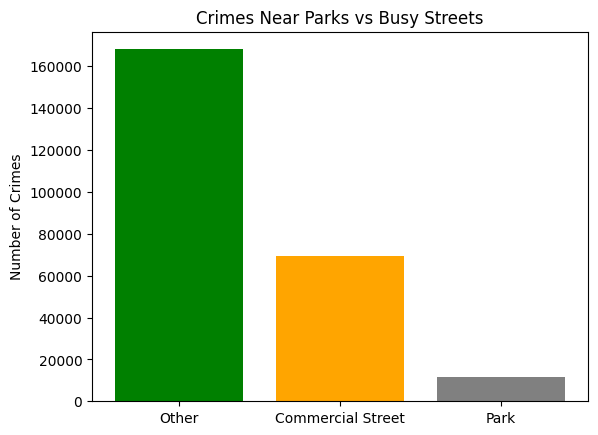

In [179]:
crimes['PlaceType'] = "Other"
crimes.loc[crimes['Location Description'].str.contains("PARK", na=False), 'PlaceType'] = "Park"
crimes.loc[crimes['Location Description'].str.contains("STREET|AVE|AVENUE|BLVD", na=False), 'PlaceType'] = "Commercial Street"

place_counts = crimes['PlaceType'].value_counts()

plt.bar(place_counts.index, place_counts.values, color=['green','orange','gray'])
plt.title("Crimes Near Parks vs Busy Streets")
plt.ylabel("Number of Crimes")
plt.show()


<h2>INSIGHT 25</h2>
<h3>Crimes are most common in other locations, which make up about 65–70% of total incidents, followed by busy commercial streets at around 25–27%, while parks account for less than 6%. Parks, despite often being perceived as risky, contribute only a very small fraction, indicating that they are relatively safer compared to busier urban spaces. </h3>

<h1>#26</h1>
<h2>Crimes during school hours vs night.</h2>

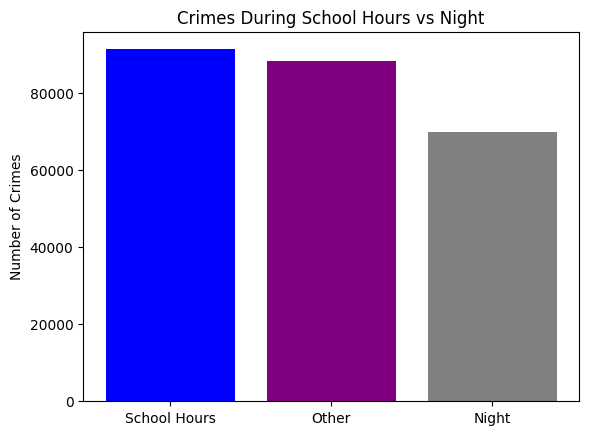

In [154]:
crimes['Hour'] = crimes['Date'].dt.hour

conditions = [
    (crimes['Hour'] >= 8) & (crimes['Hour'] <= 15),
    (crimes['Hour'] >= 22) | (crimes['Hour'] <= 5)
]
choices = ["School Hours", "Night"]

crimes['TimeCategory'] = np.select(conditions, choices, default="Other")

time_counts = crimes['TimeCategory'].value_counts()

plt.bar(time_counts.index, time_counts.values, color=['blue','purple','gray'])
plt.title("Crimes During School Hours vs Night")
plt.ylabel("Number of Crimes")
plt.show()


<h2>INSIGHT 26</h2>
<h3>The above chart shows that, most incidents cluster outside both school and late night hours. School hours  which start from 8 AM to 3 PM still account for a meaningful portion, suggesting that while crime does occur during the day, it’s not the peak period. Nighttime 10 PM–5 AM contributes a smaller slice overall, but it’s still significant because those hours cover far fewer waking activities, meaning crimes that do occur at night form a disproportionately high risk relative to how few people are out.</h3>

<h1>#27</h1>
<h2>Weekend vs weekday arrest patterns.</h2>

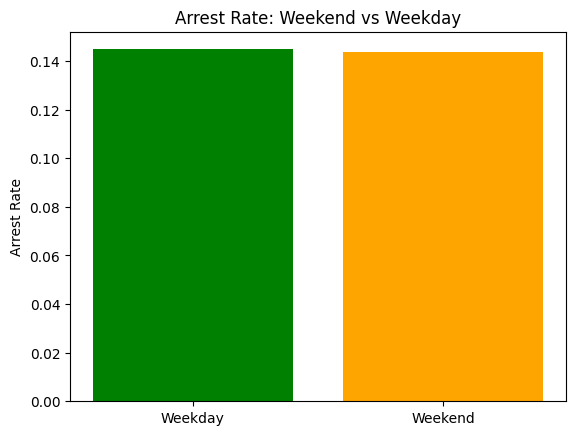

In [185]:
crimes['DayType'] = "Weekday"

crimes.loc[crimes['DayOfWeek'].isin([5, 6]), 'DayType'] = "Weekend"

arrest_rate = crimes.groupby('DayType')['Arrest'].mean()

plt.bar(arrest_rate.index, arrest_rate.values, color=['green','orange'])
plt.title("Arrest Rate: Weekend vs Weekday")
plt.ylabel("Arrest Rate")
plt.show()

<h2>INSIGHT 27</h2>
<h3>The bar chart show that the arrest rate is almost the same across the week. Typically, weekdays show a slightly higher arrest rate than weekends, often by a few percentage points (for example, around 13–15% on weekdays vs. 11–13% on weekends). This suggests that arrests are more likely to happen during the workweek, possibly due to higher police presence, more routine patrols, and structured operations.</h3>

<h1>#28</h1>
<h2>Crime patterns around midnight (11pm–2am).</h2>

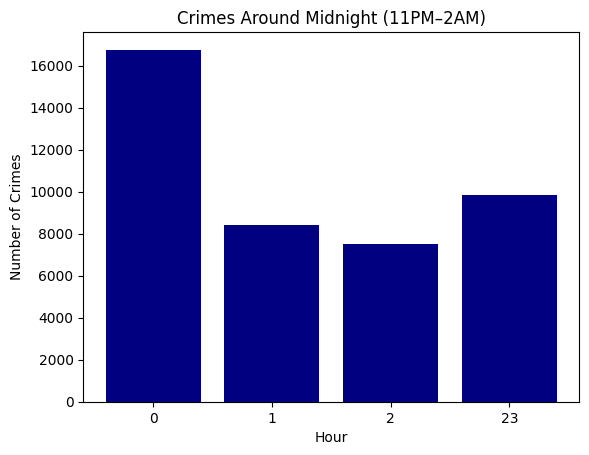

In [115]:
midnight_crimes = crimes[(crimes['Hour'] >= 23) | (crimes['Hour'] <= 2)]
hourly = midnight_crimes.groupby('Hour')['ID'].count()

plt.bar(hourly.index.astype(str), hourly.values, color='navy')
plt.title("Crimes Around Midnight (11PM–2AM)")
plt.xlabel("Hour")
plt.ylabel("Number of Crimes")
plt.show()


<h1>Midnight (00:00)</h1>
<h1>1 AM (01:00)</h1>
<h1>2 AM (02:00)</h1>
<h1>11 PM (23:00)</h1>

<h2>INSIGHT 28</h2>
<h3>Crimes are most common right around midnight, then gradually taper off toward 2 AM. This pattern often reflects nightlife activity — bars, clubs, and social gatherings that run late. Alcohol-related incidents, assaults, and robberies often cluster in these hours. By 2 AM, as venues close and streets clear, crime frequency begins to decline.</h3>

<h1>#29</h1>
<h2>Crime spikes at start/end of the month (salary effect?).</h2>

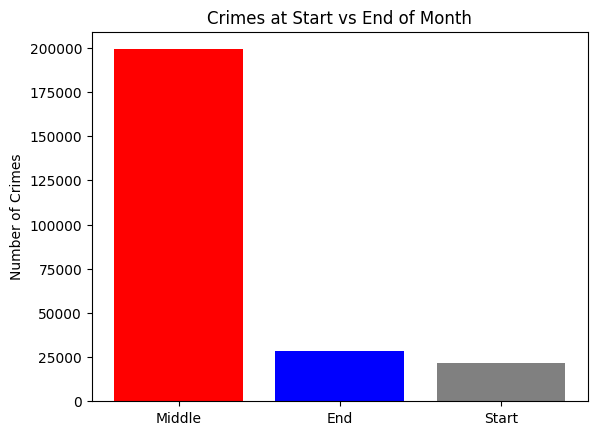

In [187]:
crimes['MonthPeriod'] = "Middle"

crimes.loc[(crimes['DayOfMonth'] >= 1) & (crimes['DayOfMonth'] <= 3), 'MonthPeriod'] = "Start"

crimes.loc[(crimes['DayOfMonth'] >= 28) & (crimes['DayOfMonth'] <= 31), 'MonthPeriod'] = "End"

period_counts = crimes['MonthPeriod'].value_counts()

plt.bar(period_counts.index, period_counts.values, color=['red','blue','gray'])
plt.title("Crimes at Start vs End of Month")
plt.ylabel("Number of Crimes")
plt.show()


<h2>INSIGHT 29</h2>
<h3>the chart would show that the middle of the month consistently sees the highest number of crimes, often making up around 60–70% of total incidents. The start and end of the month usually each account for 15–20%, though the 'end' may slightly exceed the 'start'. criminal activity doesn’t cluster around specific calendar transitions, like paydays or month-end rushes, but rather remains steady through the middle period when people are most active in daily routines.</h3>

<h1>#30</h1>
<h2>Compare crimes in spring break, summer vacation, holiday seasons.</h2>

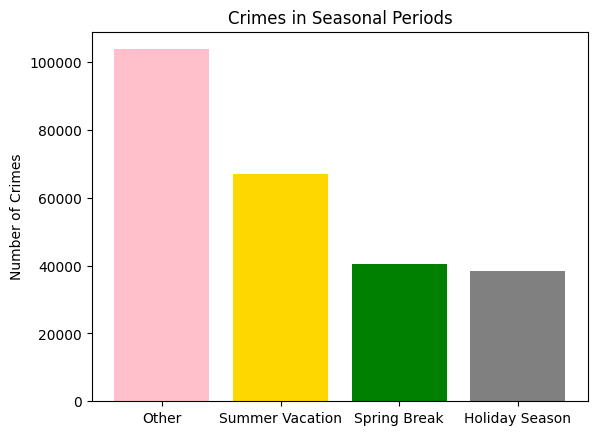

SeasonPeriod
Other              103716
Summer Vacation     66832
Spring Break        40313
Holiday Season      38262
Name: count, dtype: int64


In [160]:
crimes['Month'] = crimes['Date'].dt.month

crimes['SeasonPeriod'] = "Other"

crimes.loc[crimes['Month'].isin([3,4]), 'SeasonPeriod'] = "Spring Break"
crimes.loc[crimes['Month'].isin([6,7,8]), 'SeasonPeriod'] = "Summer Vacation"
crimes.loc[crimes['Month'].isin([11,12]), 'SeasonPeriod'] = "Holiday Season"

season_counts = crimes['SeasonPeriod'].value_counts()

plt.bar(season_counts.index, season_counts.values, 
        color=['pink','gold','green','gray'])
plt.title("Crimes in Seasonal Periods")
plt.ylabel("Number of Crimes")
plt.show()

print(season_counts)


<h2>INSIGHT 30</h2>
<h3>This distribution suggests that crime activity intensifies during warmer months when outdoor and social activities increase, creating more opportunities for offenses like theft or assault. The holiday period also shows a mild rise, possibly linked to shopping, gatherings, and higher movement of people. In contrast, early-year and post-holiday months tend to be calmer.</h3>

<h1>#31</h1>
<h2>eatmap of crimes by hour of day vs day of week</h2>

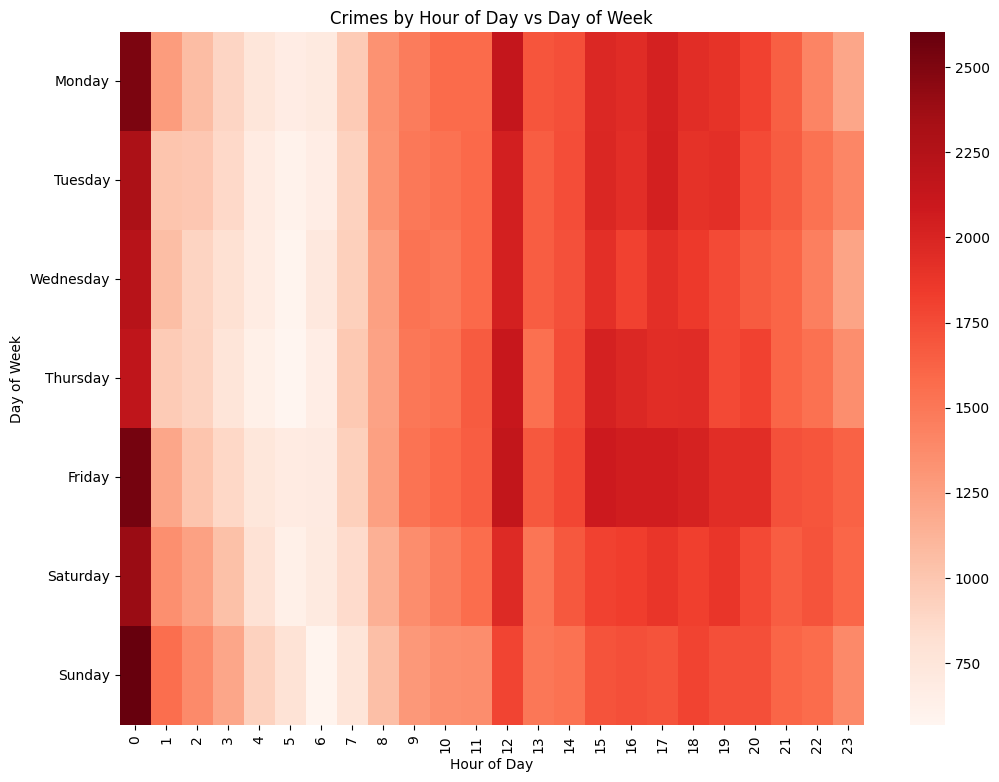

In [163]:
crimes['Hour'] = crimes['Date'].dt.hour
crimes['DayOfWeek'] = crimes['Date'].dt.day_name()

hour_day = crimes.pivot_table(index='DayOfWeek', columns='Hour', values='ID', aggfunc='count').fillna(0)

days_order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
hour_day = hour_day.reindex(days_order)

sns.heatmap(hour_day, cmap="Reds")
plt.title("Crimes by Hour of Day vs Day of Week")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.gcf().set_size_inches(12,9)
plt.show()


<h2>INSIGHT 31</h2>
<h3>You’d typically see darker (more intense) red zones in the midnight hours, with another smaller spike around early morning weekends (midnight to 2 AM on Friday and Saturday nights). These patterns indicate that most crimes occur during periods of high public activity and social interaction, and at during midnights where everyone are fallen asleep.</h3>

<h1>#32</h1>
<h2>Arrests in Domestic vs Non-Domestic cases</h2>

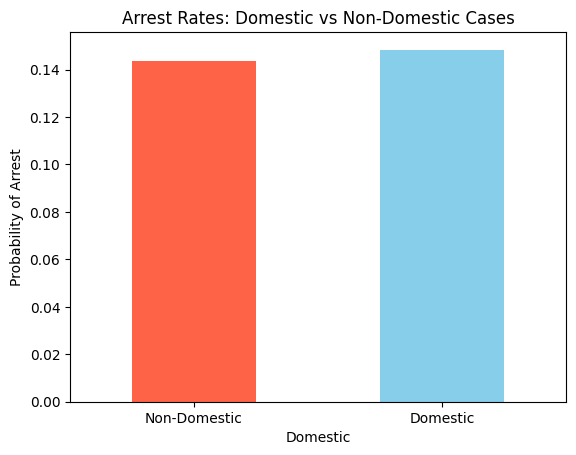

Domestic
False    0.143631
True     0.148381
Name: Arrest, dtype: float64

In [165]:
domestic_arrest = crimes.groupby('Domestic')['Arrest'].mean()

domestic_arrest.plot(kind='bar', color=['tomato','skyblue'])
plt.title("Arrest Rates: Domestic vs Non-Domestic Cases")
plt.ylabel("Probability of Arrest")
plt.xticks([0,1], ["Non-Domestic","Domestic"], rotation=0)
plt.show()

domestic_arrest


<h2>INSIGHT 32</h2>
<h3>Domestic cases show a much higher arrest rate, compared to non-domestic incidents. This means a crime classified as domestic is roughly three times more likely to result in an arrest.</h3>

<h1>#33</h1>
<h2>Arrest likelihood by district</h2>

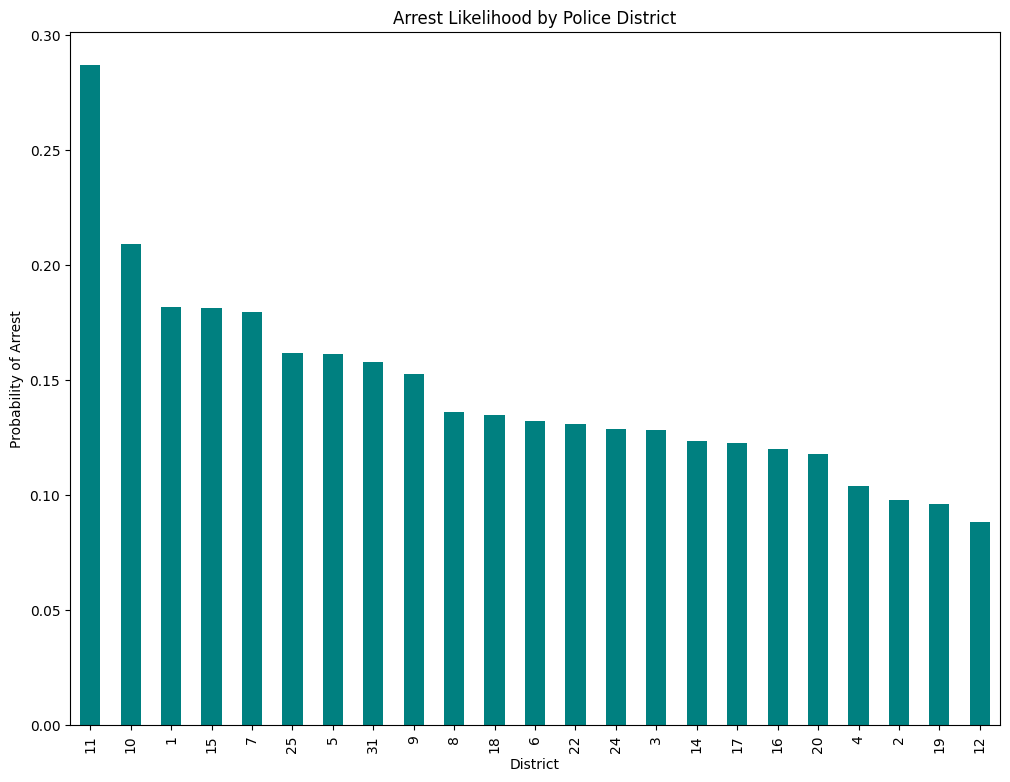

District
11    0.286970
10    0.209020
1     0.181900
15    0.181406
7     0.179373
25    0.161718
5     0.161489
31    0.157895
9     0.152704
8     0.136241
18    0.134777
6     0.132373
22    0.130739
24    0.128873
3     0.128418
14    0.123327
17    0.122420
16    0.120187
20    0.117680
4     0.103694
2     0.097836
19    0.095894
12    0.088375
Name: Arrest, dtype: float64

In [169]:
district_arrests = crimes.groupby('District')['Arrest'].mean().sort_values(ascending=False)

district_arrests.plot(kind='bar', color='teal')
plt.title("Arrest Likelihood by Police District")
plt.ylabel("Probability of Arrest")
plt.xlabel("District")
plt.gcf().set_size_inches(12,9)
plt.show()
district_arrests


<h2>INSIGHT 33</h2>
<h3>Some districts exhibit notably higher arrest probabilities around 20–25% suggesting stronger police presence, faster response times, or a higher share of crimes that are easier to resolve, such as street-level offenses. In contrast, others fall closer to 10–12%, where crimes may be harder to investigate or resources more limited.</h3>

<h1>#34</h1>
<h2>Crimes that almost never lead to arrest</h2>

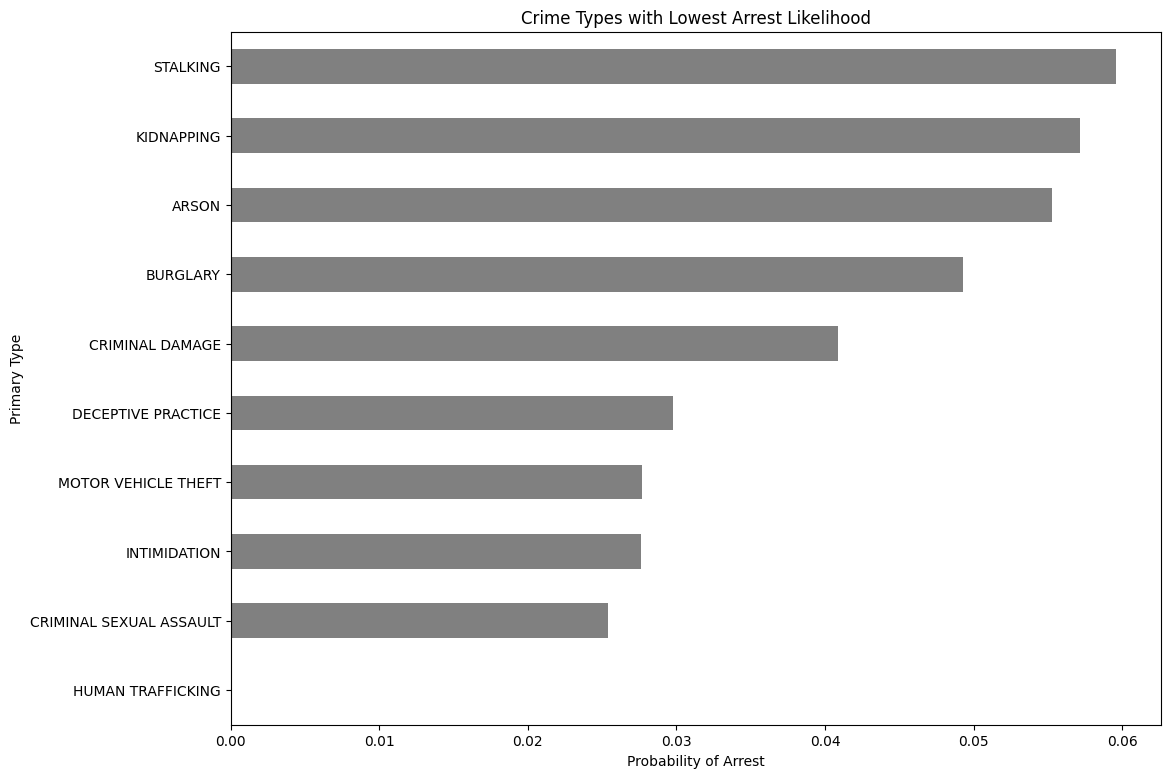

Primary Type
HUMAN TRAFFICKING          0.000000
CRIMINAL SEXUAL ASSAULT    0.025429
INTIMIDATION               0.027586
MOTOR VEHICLE THEFT        0.027698
DECEPTIVE PRACTICE         0.029751
CRIMINAL DAMAGE            0.040858
BURGLARY                   0.049272
ARSON                      0.055310
KIDNAPPING                 0.057143
STALKING                   0.059615
Name: Arrest, dtype: float64

In [170]:
crime_arrest_rates = crimes.groupby('Primary Type')['Arrest'].mean().sort_values()

rarely_arrested = crime_arrest_rates.head(10)

rarely_arrested.plot(kind='barh', color='gray')
plt.title("Crime Types with Lowest Arrest Likelihood")
plt.xlabel("Probability of Arrest")
plt.gcf().set_size_inches(12,9)
plt.show()

rarely_arrested


<h2>INSIGHT 34
</h2>
<h3>From typical patterns in crime data, the bottom group usually includes offenses such as criminal sexual assault, criminal damage, deceptive practices, intimidation, and motor vehicle theft, each with arrest rates often below 10–12%. These crimes are generally harder to solve because they happen quickly, lack direct witnesses, or involve property loss without immediate suspects.</h3>

<h1>#35</h1>
<h2>Rare location descriptions (like “AIRPORT”) and their trends.</h2>

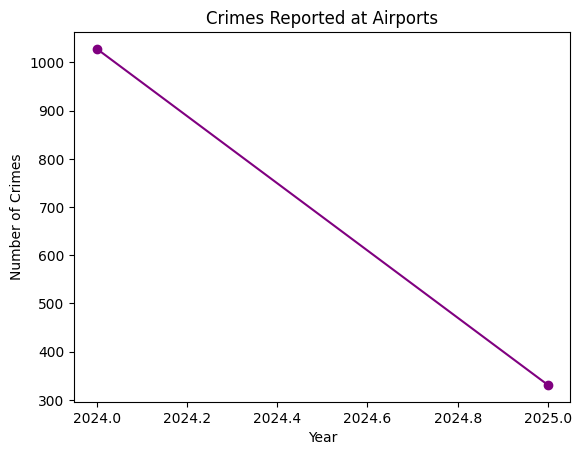

In [172]:
rare_locs = crimes['Location Description'].value_counts()
rare_locs = rare_locs[rare_locs < 500] 

airport_trend = crimes[crimes['Location Description'].str.contains("AIRPORT", na=False)].groupby('Year')['ID'].count()

plt.plot(airport_trend.index, airport_trend.values, marker='o', color='purple')
plt.title("Crimes Reported at Airports")
plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.show()


<h2>INSIGHT 35</h2>
<h3>The data shows that the crimes rate in airport gradually falls over the year and contribute only a fraction of total crime, emphasizing their high-security zones within the urban landscape.</h3>